In [1]:
#Sys.setenv("CUDA_VISIBLE_DEVICES" = -1) 

In [1]:
library(keras)
library(repr)

In [2]:
cv_tune_builder <- function (builder, params, x, y, cv=4){
    l=as.integer(nrow(x)/cv)
    accs <- NULL
    for(i in 0:(cv-1)){
        x_tr <- x[-(i*l+1):-(l*(i+1)),]; x_cv <- x[(i*l+1):(l*(i+1)),]; 
        y_tr <- y[-(i*l+1):-(l*(i+1)),]; y_cv <- y[(i*l+1):(l*(i+1)),];
        model <- builder(params)
        eph    = ifelse('epochs'     %in% names(params), params$epochs     , 30  )
        b_size = ifelse('batch_size' %in% names(params), params$batch_size , 128 )
        hist  <- model %>% fit (x_tr, y_tr,  epochs = eph, batch_size = b_size)
        stats <- model %>% evaluate(x_cv, y_cv)
        accs <- c(accs, stats[[2]])
    }
    return (accs)
}


tune_builder <- function(builder, par_default, par_list, x, y, cv=4, verbose=FALSE){
    grid = expand.grid(par_list)
    mean_accs <- NULL
    best_acc <- 0.0
    par_best <- rlang::duplicate(par_default, shallow=FALSE)
    for(i in 1:nrow(grid)){
        par_copy <- rlang::duplicate(par_default, shallow=FALSE)
        for (name in names(par_list)){
            par_copy[[name]] <- grid[[name]][i]
        }
        acc <- cv_tune_builder(builder, par_copy, x, y, cv)
        mean_accs <- c(mean_accs, mean(acc))
        if(verbose){
            print("Parameters: ")
            print(par_copy)
            print("Accuracies:")
            print(acc)
            print(paste("Mean: ", mean(acc)))
        }
        if (mean(acc)>best_acc){
            best_acc <- mean(acc)
            par_best <- rlang::duplicate(par_copy, shallow=FALSE)
        }        
    }
    if(verbose){
        print("Best Parameters: ")
        print(par_best)
        print(paste("Accuracy:", best_acc))
    }
    grid$Mean_acc <- mean_accs
    #return(par_best)
    return (grid)
}

In [4]:
data.bkg  <- read.csv("data/P_LHCB_LambdaB/background.csv")
data.sig  <- read.csv("data/P_LHCB_LambdaB/MC_signal.csv")
data.lhcb <- read.csv("data/P_LHCB_LambdaB/data_lhcb.csv")

In [6]:
data.cutted.bkg  <-  data.bkg  %>% dplyr::filter( (Lambda_b0_MM_F > 5550 &  Lambda_b0_MM_F < 5680 ) |  DeltaM_F < 360)
data.cutted.sig  <-  data.sig  %>% dplyr::filter( (Lambda_b0_MM_F > 5550 &  Lambda_b0_MM_F < 5680 ) |  DeltaM_F < 360)
data.cutted.lhcb <-  data.lhcb %>% dplyr::filter( (Lambda_b0_MM_F > 5550 &  Lambda_b0_MM_F < 5680 ) |  DeltaM_F < 360)

In [7]:
length(data.cutted.sig$Lambda_b0_MM_F)

[1] 1490

In [8]:
length(data.cutted.lhcb$Lambda_b0_MM_F)

[1] 69592

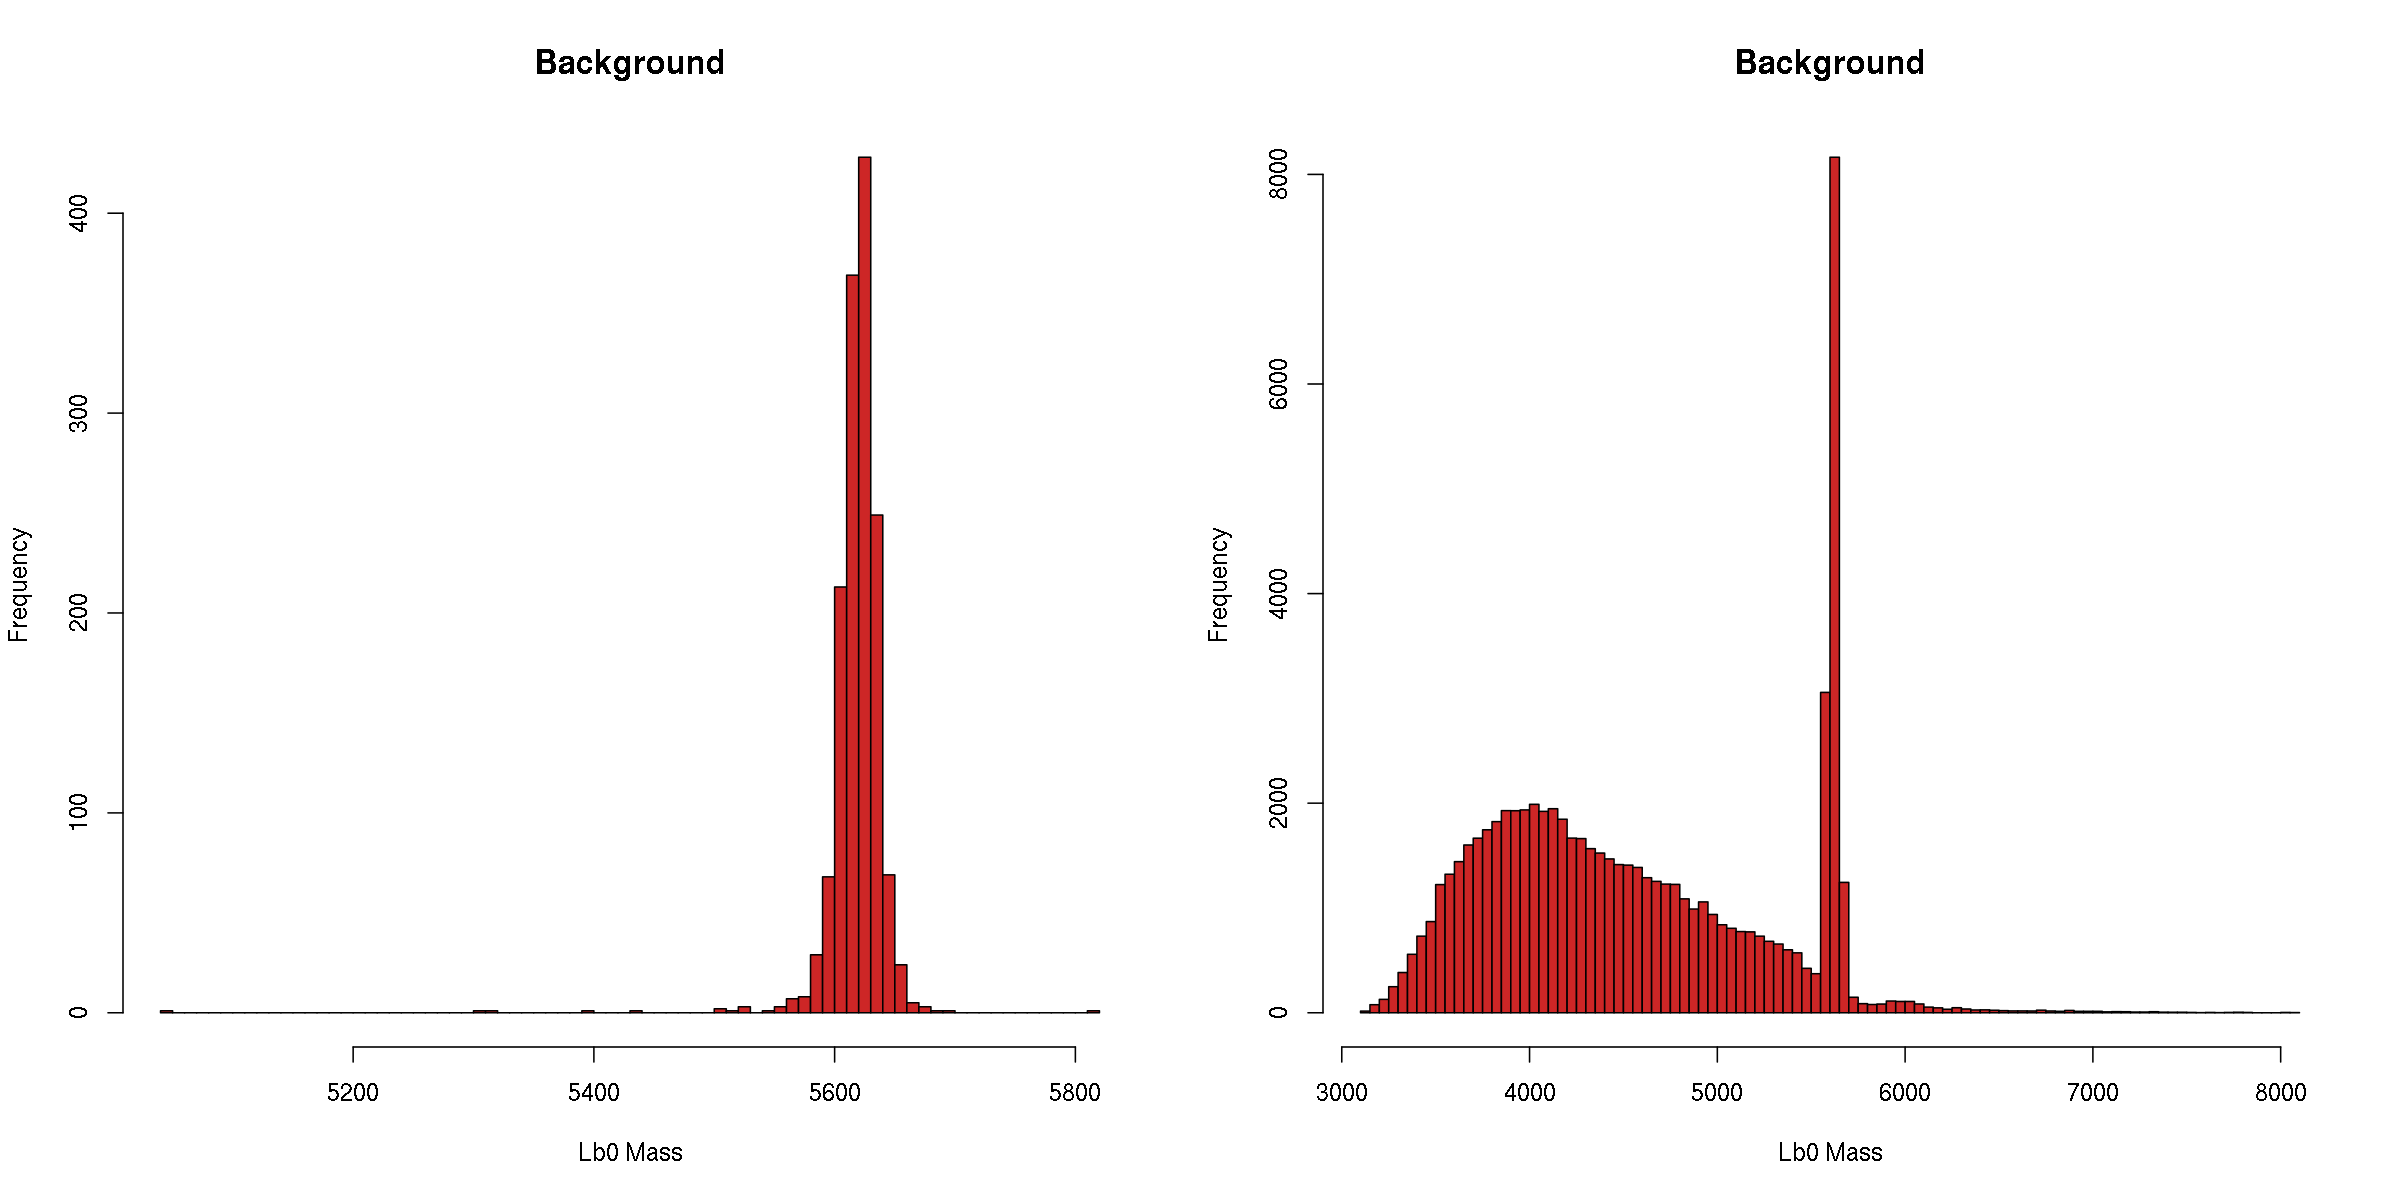

In [9]:
par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=8, repr.plot.res=150)
hist(data.cutted.sig$Lambda_b0_MM_F, breaks=100, col="firebrick3", xlab="Lb0 Mass", main="Background")
#hist(data.cutted.sig$Lambda_b0_MM_F, breaks=100, col="firebrick3", xlab="Lb0 Mass", main="Signal")
hist(data.cutted.lhcb$Lambda_b0_MM_F, breaks=100, col="firebrick3", xlab="Lb0 Mass", main="Background")

| Feature Id | Feature Code                      | Feature Meaning                                      |
| :-:        | :-:                               | :-:                                                  |
| 2          | <b>lcstar_MM_F               </b> | $\Lambda_c^{+*}$ invariant mass                      |
| 3          | <b>Lambda_c_MM_F             </b> | $\Lambda_c^+$ invariant mass                         |
| 4          | <b>Lambda_b0_MM_F            </b> | $\Lambda_b^0$ invariant mass                         |
| 5          | <b>lc_p_ProbNNp_F            </b> | Probability of $\Lambda_c^+p$ identified as a proton |
| 6          | <b>lcZDecLSigma_F            </b> | $\Lambda_c^+$ z decay length over error              |
| 7          | <b>lcstarZDecLSigma_F        </b> | $\Lambda_c^{+*}$ z decay length over error           |
| 8          | <b>lcDecTime_F               </b> | $\Lambda_c^+$ decay time                             |
| 9          | <b>lcstarDecTime_F           </b> | $\Lambda_c^{+*}$ decay time                          |
| 10         | <b>lbDecTime_F               </b> | $\Lambda_b^0$ decay time                             |
| 11         | <b>lcDecVerChi2_F            </b> | $\Lambda_c^+$ decay vertex                           |
| 12         | <b>lcstarDecVerChi2_F        </b> | $\Lambda_c^{+*}$ decay vertex                        |
| 13         | <b>lbDecVerChi2_F            </b> | $\Lambda_b^0$ decay vertex                           |
| 14         | <b>Lambda_b0_DIRA_OWNPV_F    </b> | $\Lambda_b^0$ DIRA of PV                             |
| 15         | <b>DeltaM_F                  </b> | $\Delta M$                                           |
| 16         | <b>pair_lcstar_F             </b> | Pair mass of the two $\pi$ of the $\Lambda_c^{∗+}$   |
| 17         | <b>pair0_3pi_F               </b> | Pair mass of the two $\pi_0$ and $\pi_1$ (???)       |
| 18         | <b>pair1_3pi_F               </b> | Pair mass of the two $\pi_1$ and $\pi_2$ (???)       |
| 19         | <b>Lambda_b0_BKGCAT_F        </b> | ???                                                  |
| 20         | <b>lcstar_BKGCAT_F           </b> | ???                                                  |
| 21         | <b>Lambda_c_BKGCAT_F         </b> | ???                                                  |
| 22         | <b>tau_pion0_ProbNNpi_F      </b> | ???                                                  |
| 23         | <b>tau_pion1_ProbNNpi_F      </b> | ???                                                  |
| 24         | <b>tau_pion2_ProbNNpi_F      </b> | ???                                                  |
| 25         | <b>lcstar_pim_ProbNNpi_F     </b> | ???                                                  |
| 26         | <b>lcstar_pip_ProbNNpi_F     </b> | ???                                                  |
| 27         | <b>Lambda_b0_ENDVERTEX_CHI2_F</b> | ???                                                  |
| 28         | <b>Lambda_c_ENDVERTEX_CHI2_F </b> | ???                                                  |
| 29         | <b>lcstar_ENDVERTEX_CHI2_F   </b> | ???                                                  |

In [10]:
# "lcstar_MM_F", "Lambda_b0_MM_F", "DeltaM_F", "pair_lcstar_F"

# "tau_pion0_ProbNNpi_F", "tau_pion1_ProbNNpi_F", "tau_pion2_ProbNNpi_F", "lcstar_pim_ProbNNpi_F", 
# "lcstar_pip_ProbNNpi_F", "Lambda_b0_ENDVERTEX_CHI2_F", 
# "Lambda_c_ENDVERTEX_CHI2_F", "lcstar_ENDVERTEX_CHI2_F"

# 2    x   lcstar_MM_F               
# 3        Lambda_c_MM_F             
# 4    x   Lambda_b0_MM_F            
# 5        lc_p_ProbNNp_F            
# 6        lcZDecLSigma_F            
# 7        lcstarZDecLSigma_F        
# 8        lcDecTime_F               
# 9        lcstarDecTime_F           
# 10       lbDecTime_F               
# 11       lcDecVerChi2_F            
# 12       lcstarDecVerChi2_F        
# 13       lbDecVerChi2_F            
# 14       Lambda_b0_DIRA_OWNPV_F    
# 15   x   DeltaM_F                  
# 16   x   pair_lcstar_F             
# 17       pair0_3pi_F               
# 18       pair1_3pi_F               
# 19   xxx Lambda_b0_BKGCAT_F        
# 20   xxx lcstar_BKGCAT_F           
# 21   xxx Lambda_c_BKGCAT_F         
# 22   xx  tau_pion0_ProbNNpi_F      
# 23   xx  tau_pion1_ProbNNpi_F      
# 24   xx  tau_pion2_ProbNNpi_F      
# 25   xx  lcstar_pim_ProbNNpi_F     
# 26   xx  lcstar_pip_ProbNNpi_F     
# 27   xx  Lambda_b0_ENDVERTEX_CHI2_F
# 28   xx  Lambda_c_ENDVERTEX_CHI2_F 
# 29   xx  lcstar_ENDVERTEX_CHI2_F   
sel_features <- c(3, 6, 7, 8, 9, 10, 11, 12, 14, 17, 18)
sig_multiply <- 1
tr_frac      <- 0.8

In [46]:
# x_train_bkg <- as.matrix(data.bkg[ 1: as.integer(nrow(data.bkg)*tr_frac), sel_features])
# x_train_sig <- as.matrix(data.sig[ 1: as.integer(nrow(data.sig)*tr_frac), sel_features])
# x_test_bkg  <- as.matrix(data.bkg[-1:-as.integer(nrow(data.bkg)*tr_frac), sel_features])
# x_test_sig  <- as.matrix(data.sig[-1:-as.integer(nrow(data.sig)*tr_frac), sel_features])
x_train_bkg <- as.matrix(data.bkg[ 1:20000, sel_features])
x_train_sig <- as.matrix(data.sig[        , sel_features])
x_test_bkg  <- as.matrix(data.bkg[-1:-as.integer(nrow(data.bkg)*tr_frac), sel_features])
x_test_sig  <- as.matrix(data.sig[-1:-as.integer(nrow(data.sig)*tr_frac), sel_features])
 

y_train_bkg <- as.vector(matrix(0, nrow=nrow(x_train_bkg), ncol=1))
y_train_sig <- as.vector(matrix(1, nrow=nrow(x_train_sig), ncol=1))
y_test_bkg  <- as.vector(matrix(0, nrow=nrow(x_test_bkg), ncol=1))
y_test_sig  <- as.vector(matrix(1, nrow=nrow(x_test_sig), ncol=1))

x_train <- rbind(x_train_bkg , x_train_sig )
x_test  <- rbind(x_test_bkg  , x_test_sig  )
y_train <-     c(y_train_bkg , y_train_sig )    
y_test  <-     c(y_test_bkg  , y_test_sig  )

if (sig_multiply>1) {
    for (i in 1:sig_multiply) {
        x_train <- rbind(x_train, x_train_sig)
        x_test  <- rbind(x_test , x_test_sig )
        y_train <-     c(y_train, y_train_sig)    
        y_test  <-     c(y_test , y_test_sig )
    }
}

shuffle_train <- sample(nrow(x_train))
shuffle_test  <- sample(nrow(x_test ))

x_train <- x_train[shuffle_train,]
y_train <- y_train[shuffle_train] 
x_test  <- x_test [shuffle_test,]
y_test  <- y_test [shuffle_test] 

#x_train <- array_reshape(x_train, c(nrow(x_train), ncol(x_train)))
#x_test  <- array_reshape(x_test , c(nrow(x_test ), ncol(x_test )))

x_train <- scale(x_train)
x_test  <- scale(x_test )

x_lhcb <- as.matrix(data.lhcb[, sel_features])
x_lhcb <- scale(x_lhcb)
x_cutted_lhcb <- as.matrix(data.cutted.lhcb[, sel_features])
x_cutted_lhcb <- scale(x_cutted_lhcb)

In [12]:
build_model <- function(params){
    model <- keras_model_sequential()
    model %>%
      layer_dense(units = params$unit1, activation = 'relu', 
                  input_shape = c(params$nFeat), 
                  kernel_regularizer=regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
      layer_dropout(rate = params$dropout1) %>%
      layer_dense(units = params$unit2, activation = 'relu',  
                  kernel_regularizer=regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
      layer_dropout(rate = params$dropout2) %>%
      layer_dense(units = params$unit3, activation = 'relu', 
                  kernel_regularizer=regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
      layer_dropout(rate = params$dropout3) %>%
      #layer_dense(units = params$unit4, activation = 'relu', 
      #            kernel_regularizer=regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
      #layer_dropout(rate = params$dropout4) %>%
      #layer_dense(units = params$unit5, activation = 'relu', 
      #            kernel_regularizer=regularizer_l1_l2(l1=params$l1_coeff, l2=params$l2_coeff)) %>%
      #layer_dropout(rate = params$dropout5) %>%
      layer_dense(units = 1, activation = 'sigmoid')

    model %>% compile(
      loss = 'binary_crossentropy',
      optimizer = optimizer_rmsprop(),
      metrics = c('accuracy')
    )
    return(model)
}
myParams <- flags(
    flag_numeric("dropout1", 0.1),
    flag_numeric("dropout2", 0.1),
    flag_numeric("dropout3", 0.1),
    #flag_numeric("dropout4", 0.1),
    #flag_numeric("dropout5", 0.1),
    flag_numeric("unit1", 128),
    flag_numeric("unit2", 64),
    flag_numeric("unit3", 32),
    #flag_numeric("unit4", 16),
    #flag_numeric("unit5", 8),
    flag_numeric("nFeat", ncol(x_train)),
    flag_numeric("l1_coeff", 1e-4),
    flag_numeric("l2_coeff", 1e-5)
)

## Test with custom generator

In [14]:
CUSTOM_GENERATOR = FALSE

### Train on batch

In [13]:
x_train_bkg <- as.matrix(data.bkg[ 1: as.integer(nrow(data.bkg)*tr_frac), sel_features])
x_train_sig <- as.matrix(data.sig[ 1: as.integer(nrow(data.sig)*tr_frac), sel_features])
x_test_bkg  <- as.matrix(data.bkg[-1:-as.integer(nrow(data.bkg)*tr_frac), sel_features])
x_test_sig  <- as.matrix(data.sig[-1:-as.integer(nrow(data.sig)*tr_frac), sel_features])

y_train_bkg <- as.vector(matrix(0, nrow=nrow(x_train_bkg), ncol=1))
y_train_sig <- as.vector(matrix(1, nrow=nrow(x_train_sig), ncol=1))
y_test_bkg  <- as.vector(matrix(0, nrow=nrow(x_test_bkg),  ncol=1))
y_test_sig  <- as.vector(matrix(1, nrow=nrow(x_test_sig),  ncol=1))

shuffle_train_bkg <- sample(nrow(x_train_bkg))
shuffle_test_bkg  <- sample(nrow(x_test_bkg ))
shuffle_train_sig <- sample(nrow(x_train_sig))
shuffle_test_sig  <- sample(nrow(x_test_sig ))

x_train_bkg <- x_train_bkg[shuffle_train_bkg,]
y_train_bkg <- y_train_bkg[shuffle_train_bkg] 
x_train_sig <- x_train_sig[shuffle_train_sig,]
y_train_sig <- y_train_sig[shuffle_train_sig] 
x_test_bkg <- x_test_bkg[shuffle_test_bkg,]
y_test_bkg <- y_test_bkg[shuffle_test_bkg] 
x_test_sig <- x_test_sig[shuffle_test_sig,]
y_test_sig <- y_test_sig[shuffle_test_sig]


x_train_bkg <- scale(x_train_bkg)
x_train_sig <- scale(x_train_sig)
x_test_bkg  <- scale(x_test_bkg )
x_test_sig  <- scale(x_test_sig )

x_lhcb <- as.matrix(data.lhcb[, sel_features])
x_lhcb <- scale(x_lhcb)
x_cutted_lhcb <- as.matrix(data.cutted.lhcb[, sel_features])
x_cutted_lhcb <- scale(x_cutted_lhcb)

In [81]:
model <- build_model(myParams)
model

batch_size_bkg  <-  500
batch_size_sig  <-  500
epochs          <-  100
steps_per_epoch <-   64
patience        <- epochs/10

for (i in 1:epochs) {
    if (i%%patience == 0) {
        message("Epoch ", i)
    }
    for (j in 1:steps_per_epoch) {
        rows_bkg <- sample(1:nrow(x_train_bkg), batch_size_bkg, replace = TRUE)
        rows_sig <- sample(1:nrow(x_train_sig), batch_size_sig, replace = TRUE)
        
        model %>% train_on_batch(rbind(x_train_bkg[rows_bkg,], x_train_sig[rows_sig,]), c(y_train_bkg[rows_bkg], y_train_sig[rows_sig]))
    }
}

Model
Model: "sequential_13"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_52 (Dense)                    (None, 128)                     1536        
________________________________________________________________________________
dropout_39 (Dropout)                (None, 128)                     0           
________________________________________________________________________________
dense_53 (Dense)                    (None, 64)                      8256        
________________________________________________________________________________
dropout_40 (Dropout)                (None, 64)                      0           
________________________________________________________________________________
dense_54 (Dense)                    (None, 32)                      2080        
________________________________________________________________________________

Epoch 10

Epoch 20

Epoch 30

Epoch 40

Epoch 50

Epoch 60

Epoch 70

Epoch 80

Epoch 90

Epoch 100



In [82]:
y_lhcb        <- model %>% predict_classes(x_lhcb)
y_cutted_lhcb <- model %>% predict_classes(x_cutted_lhcb)

In [83]:
unique(y_lhcb)
length(y_lhcb[y_lhcb==0])
length(y_lhcb[y_lhcb==1])

0
1


[1] 62792

[1] 6800

In [ ]:
unique(y_cutted_lhcb)
length(y_cutted_lhcb[y_cutted_lhcb==0])
length(y_cutted_lhcb[y_cutted_lhcb==1])

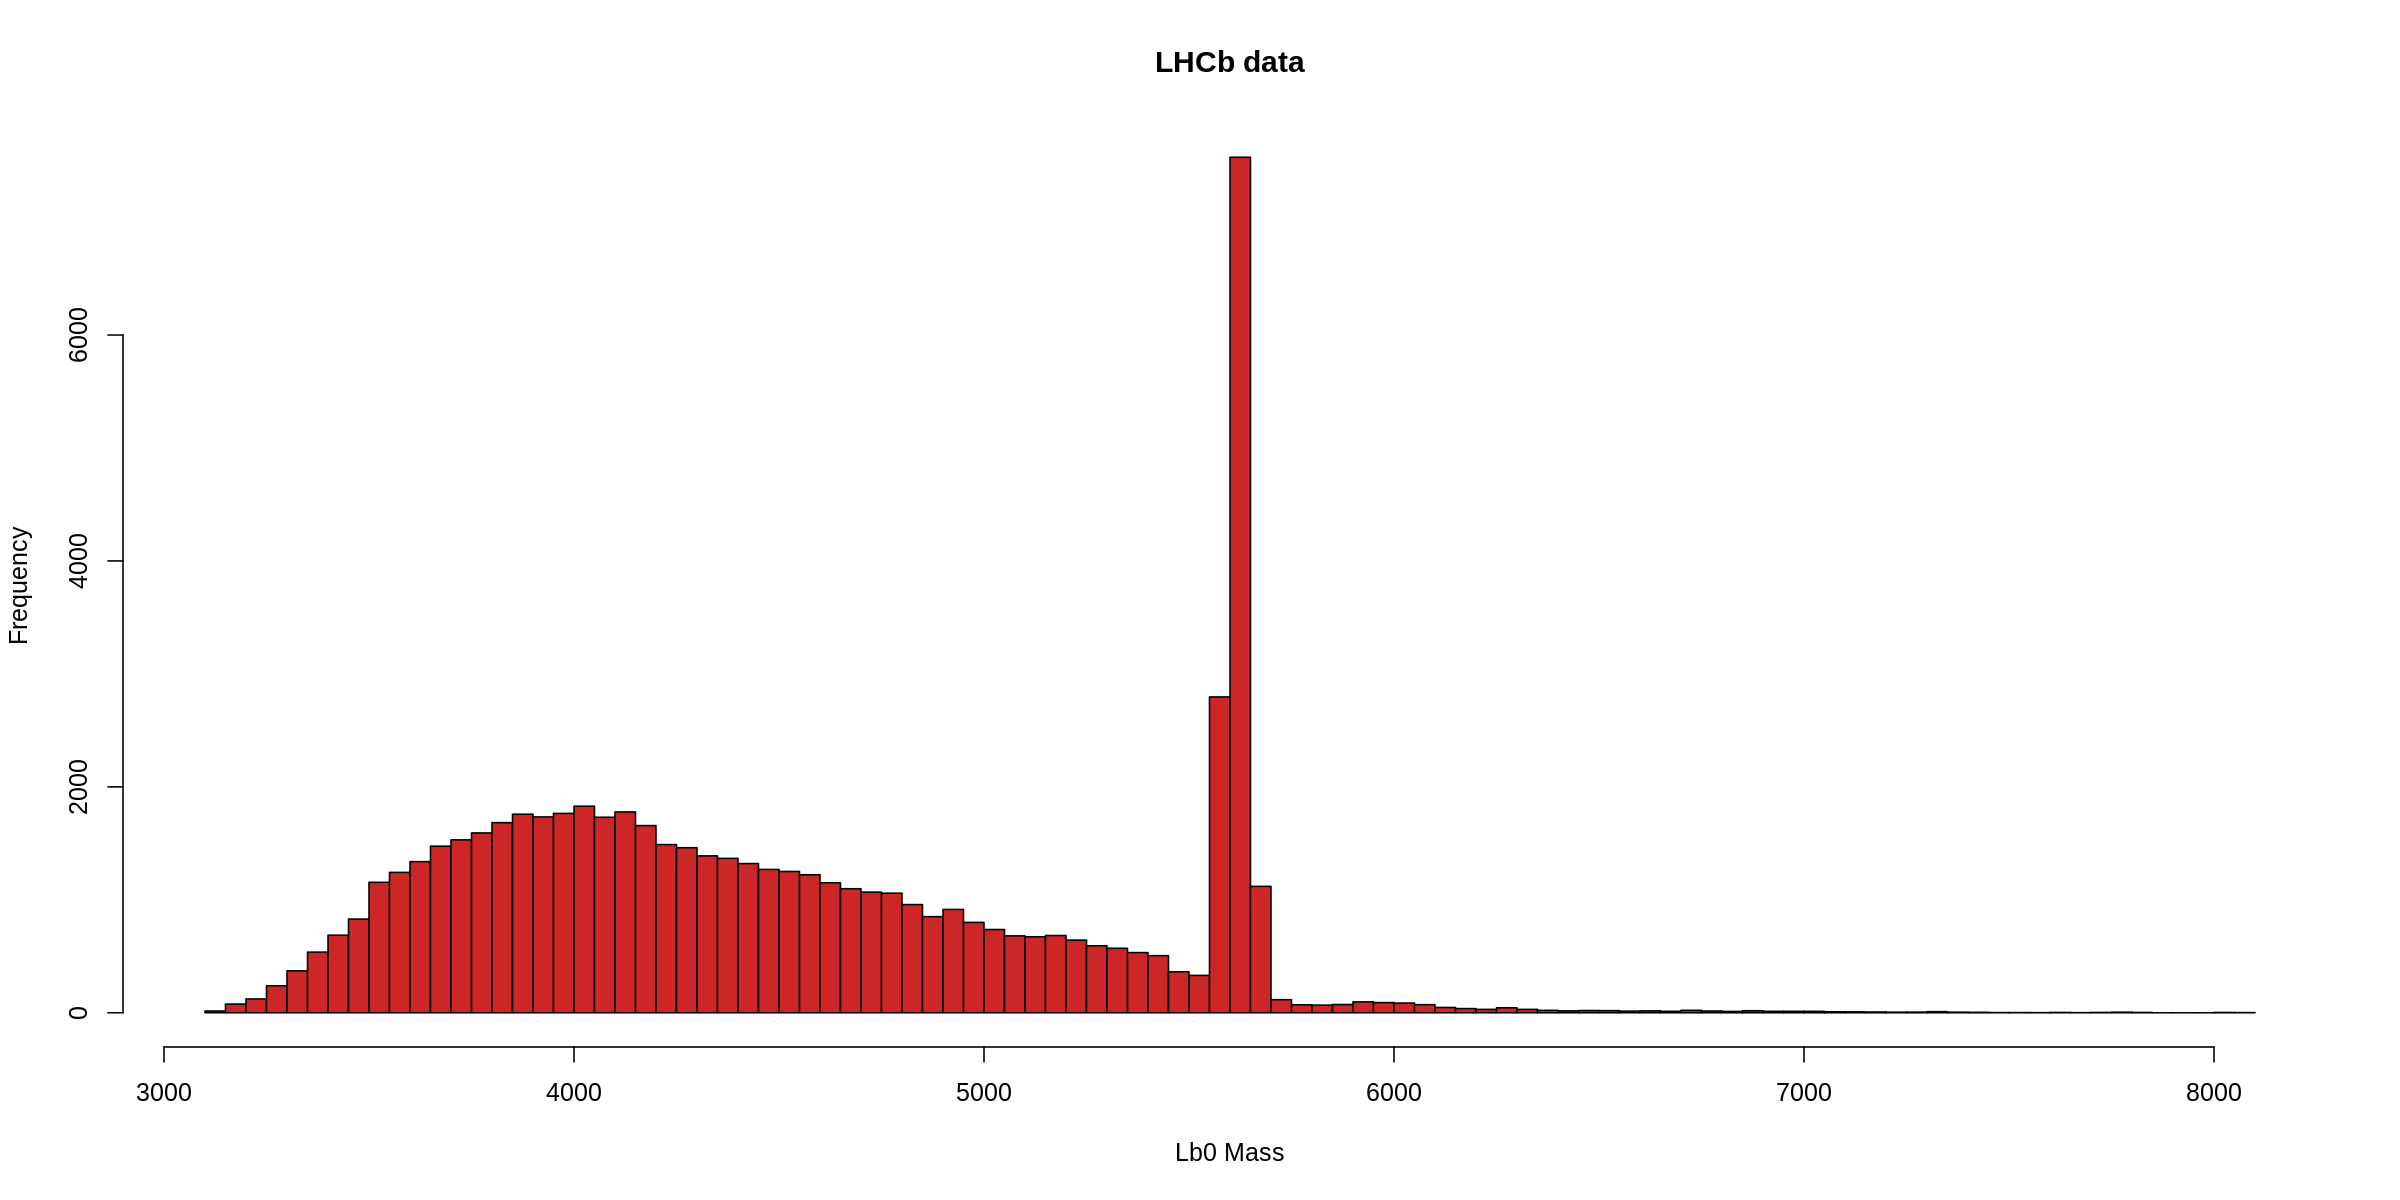

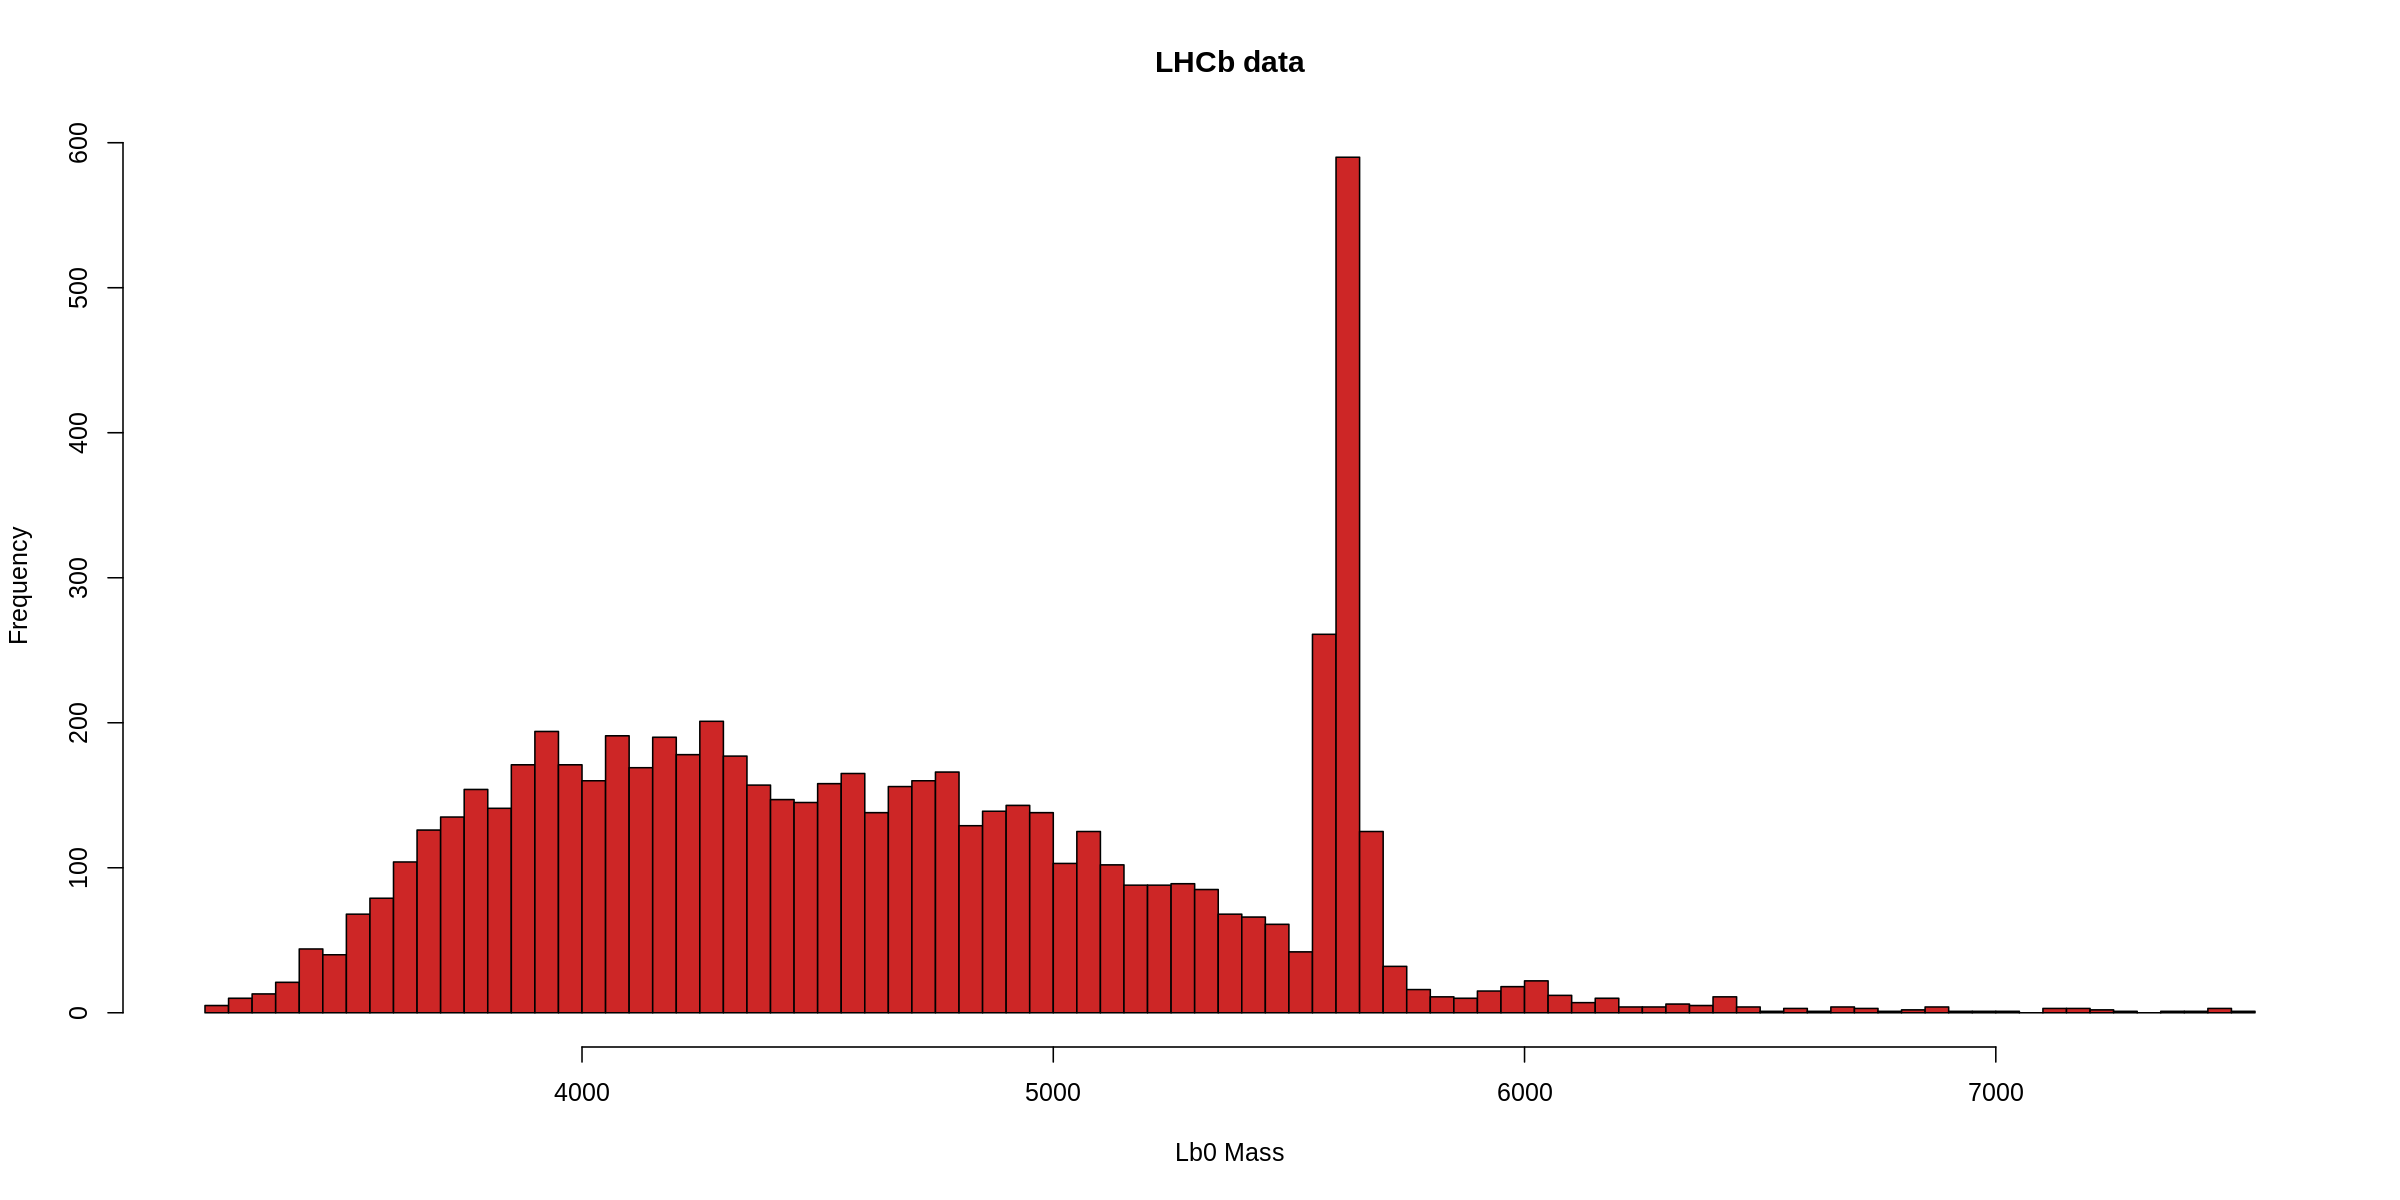

In [84]:
hist(data.cutted.lhcb$Lambda_b0_MM_F[y_cutted_lhcb==0], breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
hist(data.cutted.lhcb$Lambda_b0_MM_F[y_cutted_lhcb==1], breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)

In [ ]:
y_lhcb_pred <- model %>% predict(x_lhcb)

In [85]:
y_cutted_lhcb_pred <- model %>% predict(x_cutted_lhcb)

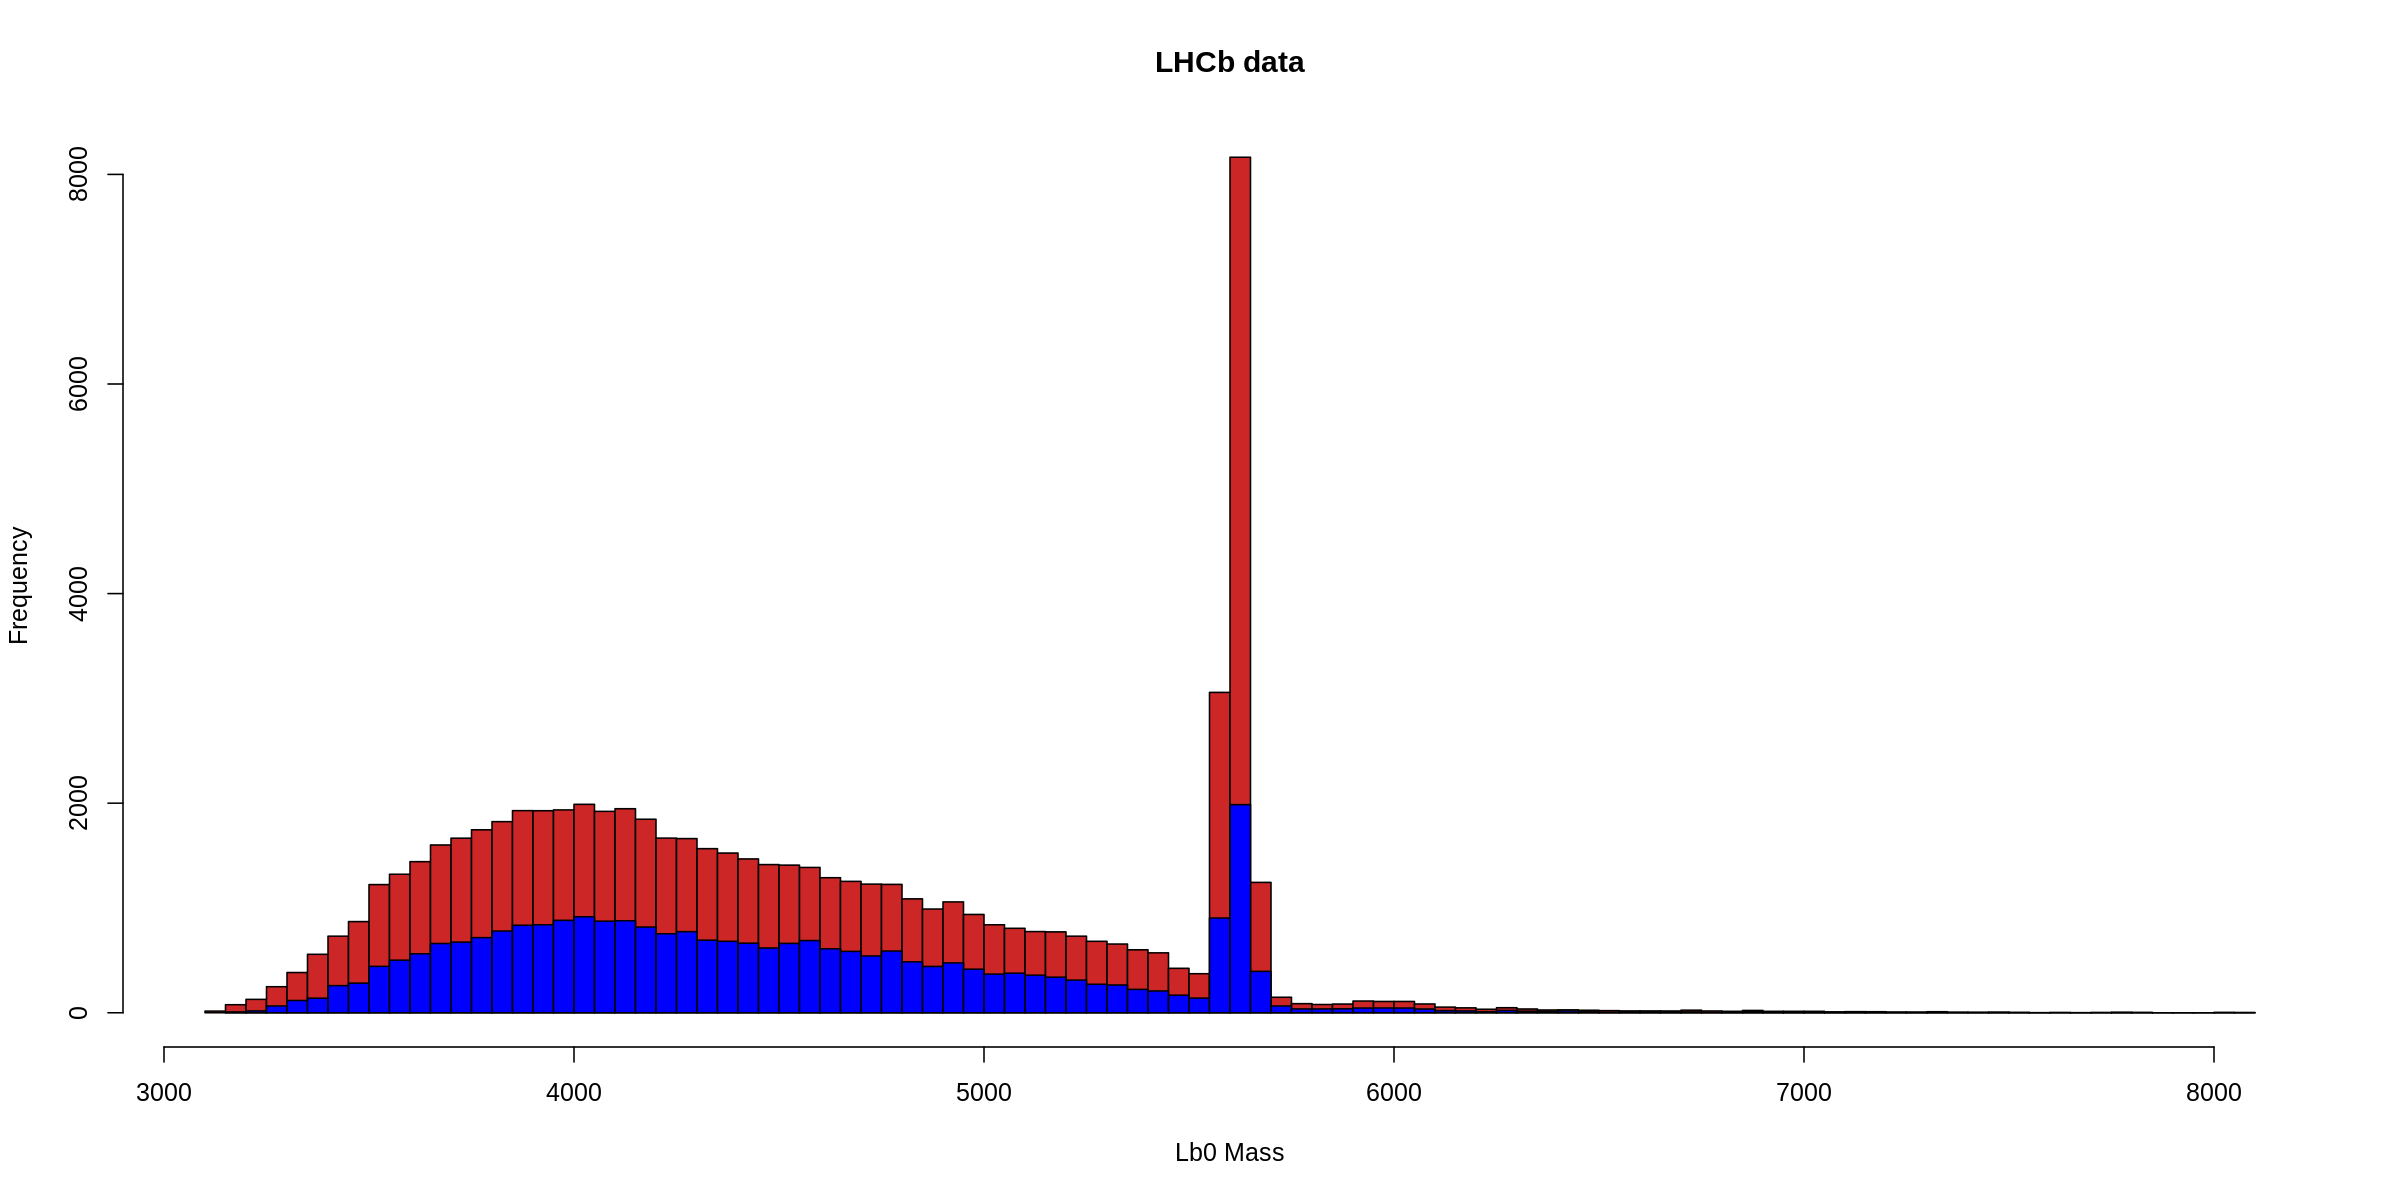

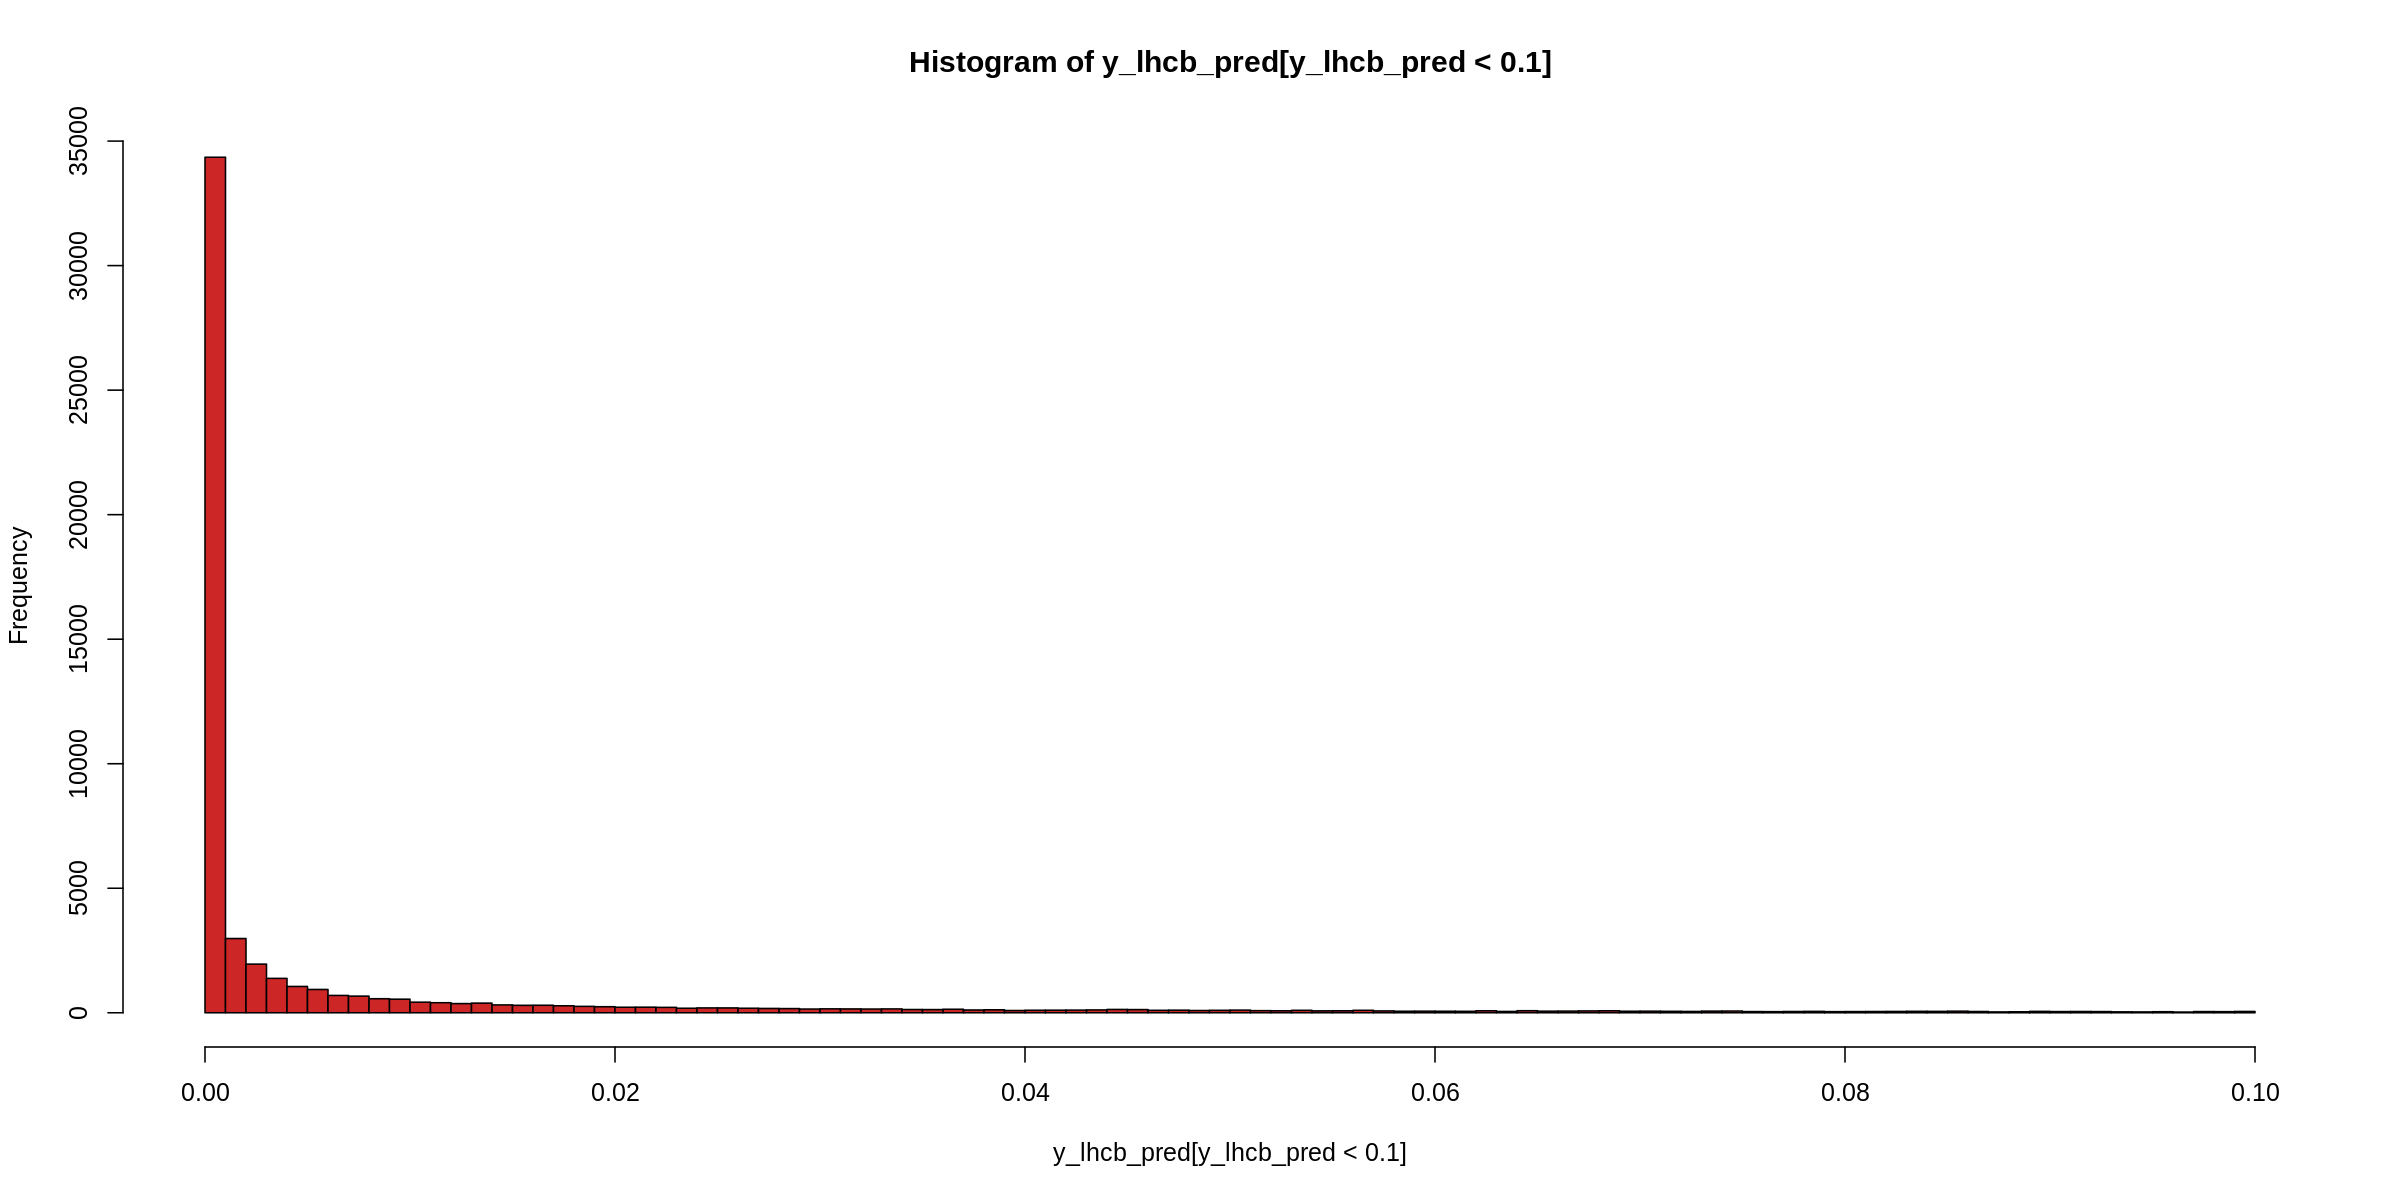

In [86]:
hist(data.cutted.lhcb$Lambda_b0_MM_F[y_cutted_lhcb_pred>0.0],   breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
hist(data.cutted.lhcb$Lambda_b0_MM_F[y_cutted_lhcb_pred>0.005], breaks=100, add=TRUE, col='blue')
hist(y_cutted_lhcb_pred[y_cutted_lhcb_pred<0.1], breaks=100, col="firebrick3")

### Custom generator

In [13]:
x_train_bkg <- as.matrix(data.bkg[ 1: as.integer(nrow(data.bkg)*tr_frac), sel_features])
x_train_sig <- as.matrix(data.sig[ 1: as.integer(nrow(data.sig)*tr_frac), sel_features])
x_test_bkg  <- as.matrix(data.bkg[-1:-as.integer(nrow(data.bkg)*tr_frac), sel_features])
x_test_sig  <- as.matrix(data.sig[-1:-as.integer(nrow(data.sig)*tr_frac), sel_features])

y_train_bkg <- as.vector(matrix(0, nrow=nrow(x_train_bkg), ncol=1))
y_train_sig <- as.vector(matrix(1, nrow=nrow(x_train_sig), ncol=1))
y_test_bkg  <- as.vector(matrix(0, nrow=nrow(x_test_bkg),  ncol=1))
y_test_sig  <- as.vector(matrix(1, nrow=nrow(x_test_sig),  ncol=1))

shuffle_train_bkg <- sample(nrow(x_train_bkg))
shuffle_test_bkg  <- sample(nrow(x_test_bkg ))
shuffle_train_sig <- sample(nrow(x_train_sig))
shuffle_test_sig  <- sample(nrow(x_test_sig ))

x_train_bkg <- x_train_bkg[shuffle_train_bkg,]
y_train_bkg <- y_train_bkg[shuffle_train_bkg] 
x_train_sig <- x_train_sig[shuffle_train_sig,]
y_train_sig <- y_train_sig[shuffle_train_sig] 
x_test_bkg <- x_test_bkg[shuffle_test_bkg,]
y_test_bkg <- y_test_bkg[shuffle_test_bkg] 
x_test_sig <- x_test_sig[shuffle_test_sig,]
y_test_sig <- y_test_sig[shuffle_test_sig]


x_train_bkg <- scale(x_train_bkg)
x_train_sig <- scale(x_train_sig)
x_test_bkg  <- scale(x_test_bkg )
x_test_sig  <- scale(x_test_sig )

#x_lhcb <- as.matrix(data.lhcb[, sel_features])
x_lhcb <- as.matrix(data.cutted.lhcb[, sel_features])
x_lhcb <- scale(x_lhcb)

In [14]:
floor(nrow(x_train_bkg) / 5000)

[1] 64

In [15]:
(nrow(x_train_sig) + nrow(x_train_bkg))/5000

[1] 64.7436

In [16]:
nrow(x_train_sig)

[1] 1192

In [17]:
#data_generator <- function(x_t_bkg, x_t_sig, y_t_bkg, y_t_sig, batch_size_bkg) {
#    function() {
#        rows <- sample(1:nrow(x_t_bkg), batch_size_bkg, replace = TRUE)
#        #message("*****************")
#        list(rbind(x_t_bkg[rows,], x_t_sig),
#             c(y_t_bkg[rows], y_t_sig))
#    }
#}

# example generator
data_generator <- function(x_tr_bkg, x_tr_sig, y_tr_bkg, y_tr_sig, batch_size_bkg) { #function(data, x, y, batch_size) {

    # start iterator
    i <- 1

    # return an iterator function
    function() {

        # reset iterator if already seen all data
        if ((i + batch_size_bkg - 1) > nrow(x_tr_bkg)) i <<- 1
        
        # iterate current batch's rows
        rows <- c(i:min(i + batch_size_bkg - 1, nrow(x_tr_bkg)))
        
        # update to next iteration
        i <<- i + batch_size_bkg
        
        ## create container arrays
        #
        #x_array <- array(0, dim = c(length(rows), length(x)))
        #y_array <- array(0, dim = c(length(rows), length(y)))
        #
        ## fill the container
        #x_array[1:length(rows), ] <- data[rows, x]
        #y_array[1:length(rows), ] <- data[rows, y]
        
        # return the batch
        #list(x_array, y_array)
        return(list(rbind(x_tr_bkg[rows,], x_tr_sig), c(y_tr_bkg[rows], y_tr_sig)))

    }

}

In [18]:
if (CUSTOM_GENERATOR) {
    model <- build_model(myParams)
    model
}

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 128)                     1536        
________________________________________________________________________________
dropout (Dropout)                   (None, 128)                     0           
________________________________________________________________________________
dense_1 (Dense)                     (None, 64)                      8256        
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 64)                      0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 32)                      2080        
________________________________________________________________________________
dr

In [ ]:
if (CUSTOM_GENERATOR) {
    history  <- model %>% fit_generator(data_generator(x_train_bkg, x_train_sig, y_train_bkg, y_train_sig, batch_size_bkg=5000), 
                                        steps_per_epoch=64, #(nrow(x_train_bkg))/(5000),
                                        epochs=10)
    # history  <- model %>% fit (x_train, y_train, verbose=2,
    #                            epochs=30, batch_size=10, validation_split=0.3)
    model %>% evaluate(x_test_bkg, y_test_bkg)
    plot(history)
}

### Standard generator

In [47]:
if (!CUSTOM_GENERATOR) {
    model <- build_model(myParams)
    model
}

Model
Model: "sequential_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_8 (Dense)                     (None, 128)                     1536        
________________________________________________________________________________
dropout_6 (Dropout)                 (None, 128)                     0           
________________________________________________________________________________
dense_9 (Dense)                     (None, 64)                      8256        
________________________________________________________________________________
dropout_7 (Dropout)                 (None, 64)                      0           
________________________________________________________________________________
dense_10 (Dense)                    (None, 32)                      2080        
________________________________________________________________________________


`geom_smooth()` using formula 'y ~ x'


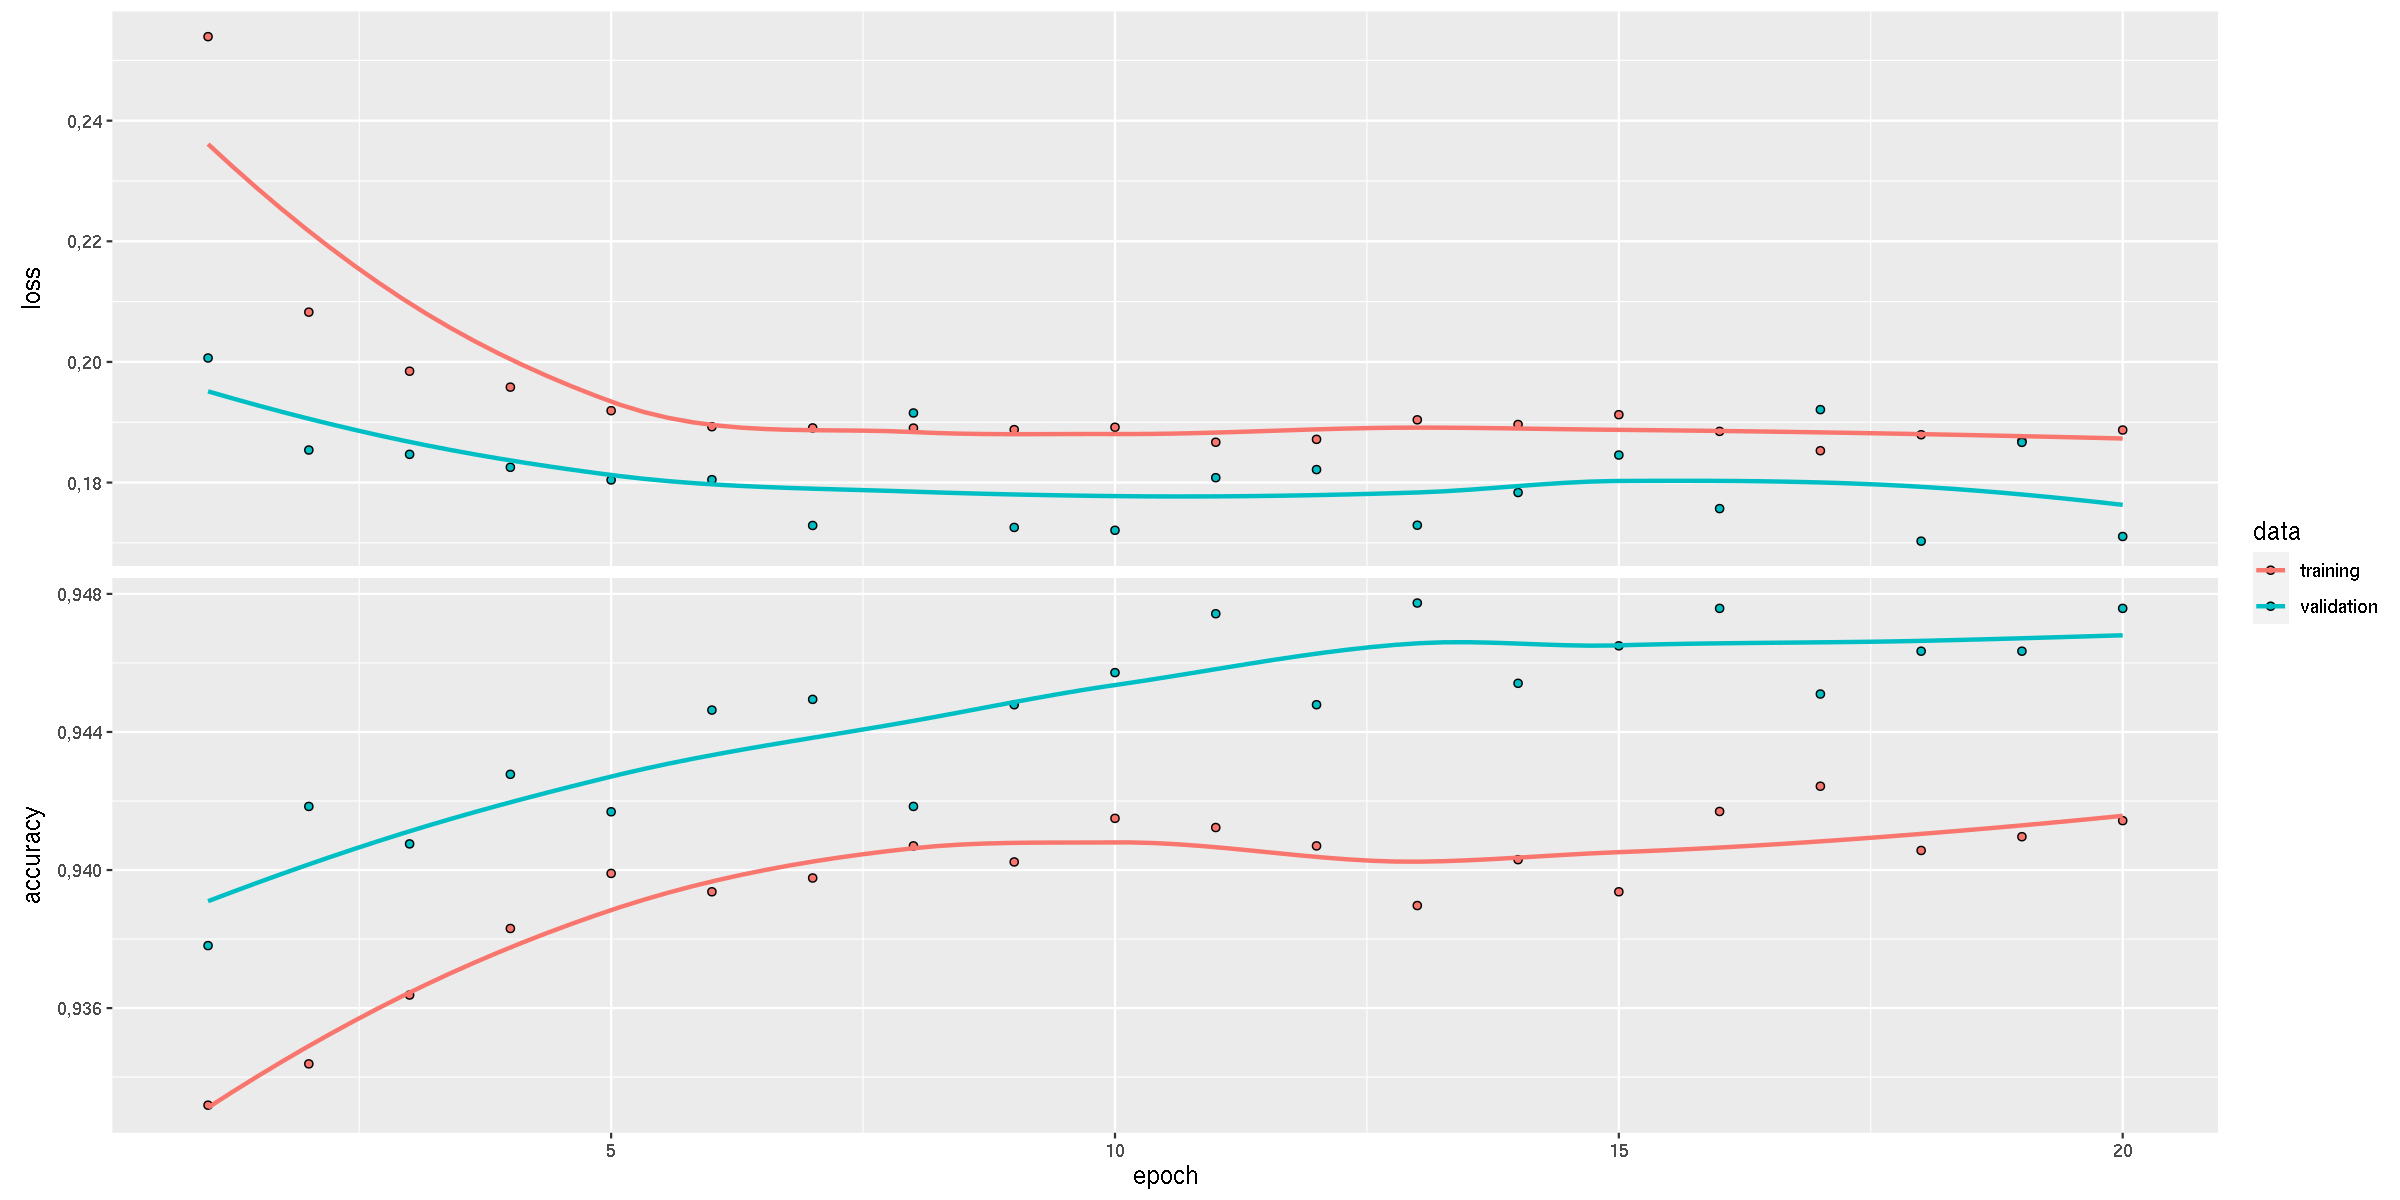

In [48]:
if (!CUSTOM_GENERATOR) {
    history  <- model %>% fit (x_train, y_train, verbose=2,
                               epochs=20, batch_size=10, validation_split=0.3)
    model %>% evaluate(x_test, y_test)
    plot(history)
}

In [49]:
y_lhcb <- model %>% predict_classes(x_lhcb)

In [50]:
y_cutted_lhcb <- model %>% predict_classes(x_cutted_lhcb)

In [51]:
unique(y_lhcb)
length(y_lhcb[y_lhcb==0])
length(y_lhcb[y_lhcb==1])

0
1


[1] 466426

[1] 6324

In [52]:
unique(y_cutted_lhcb)
length(y_cutted_lhcb[y_cutted_lhcb==0])
length(y_cutted_lhcb[y_cutted_lhcb==1])

0
1


[1] 68291

[1] 1301

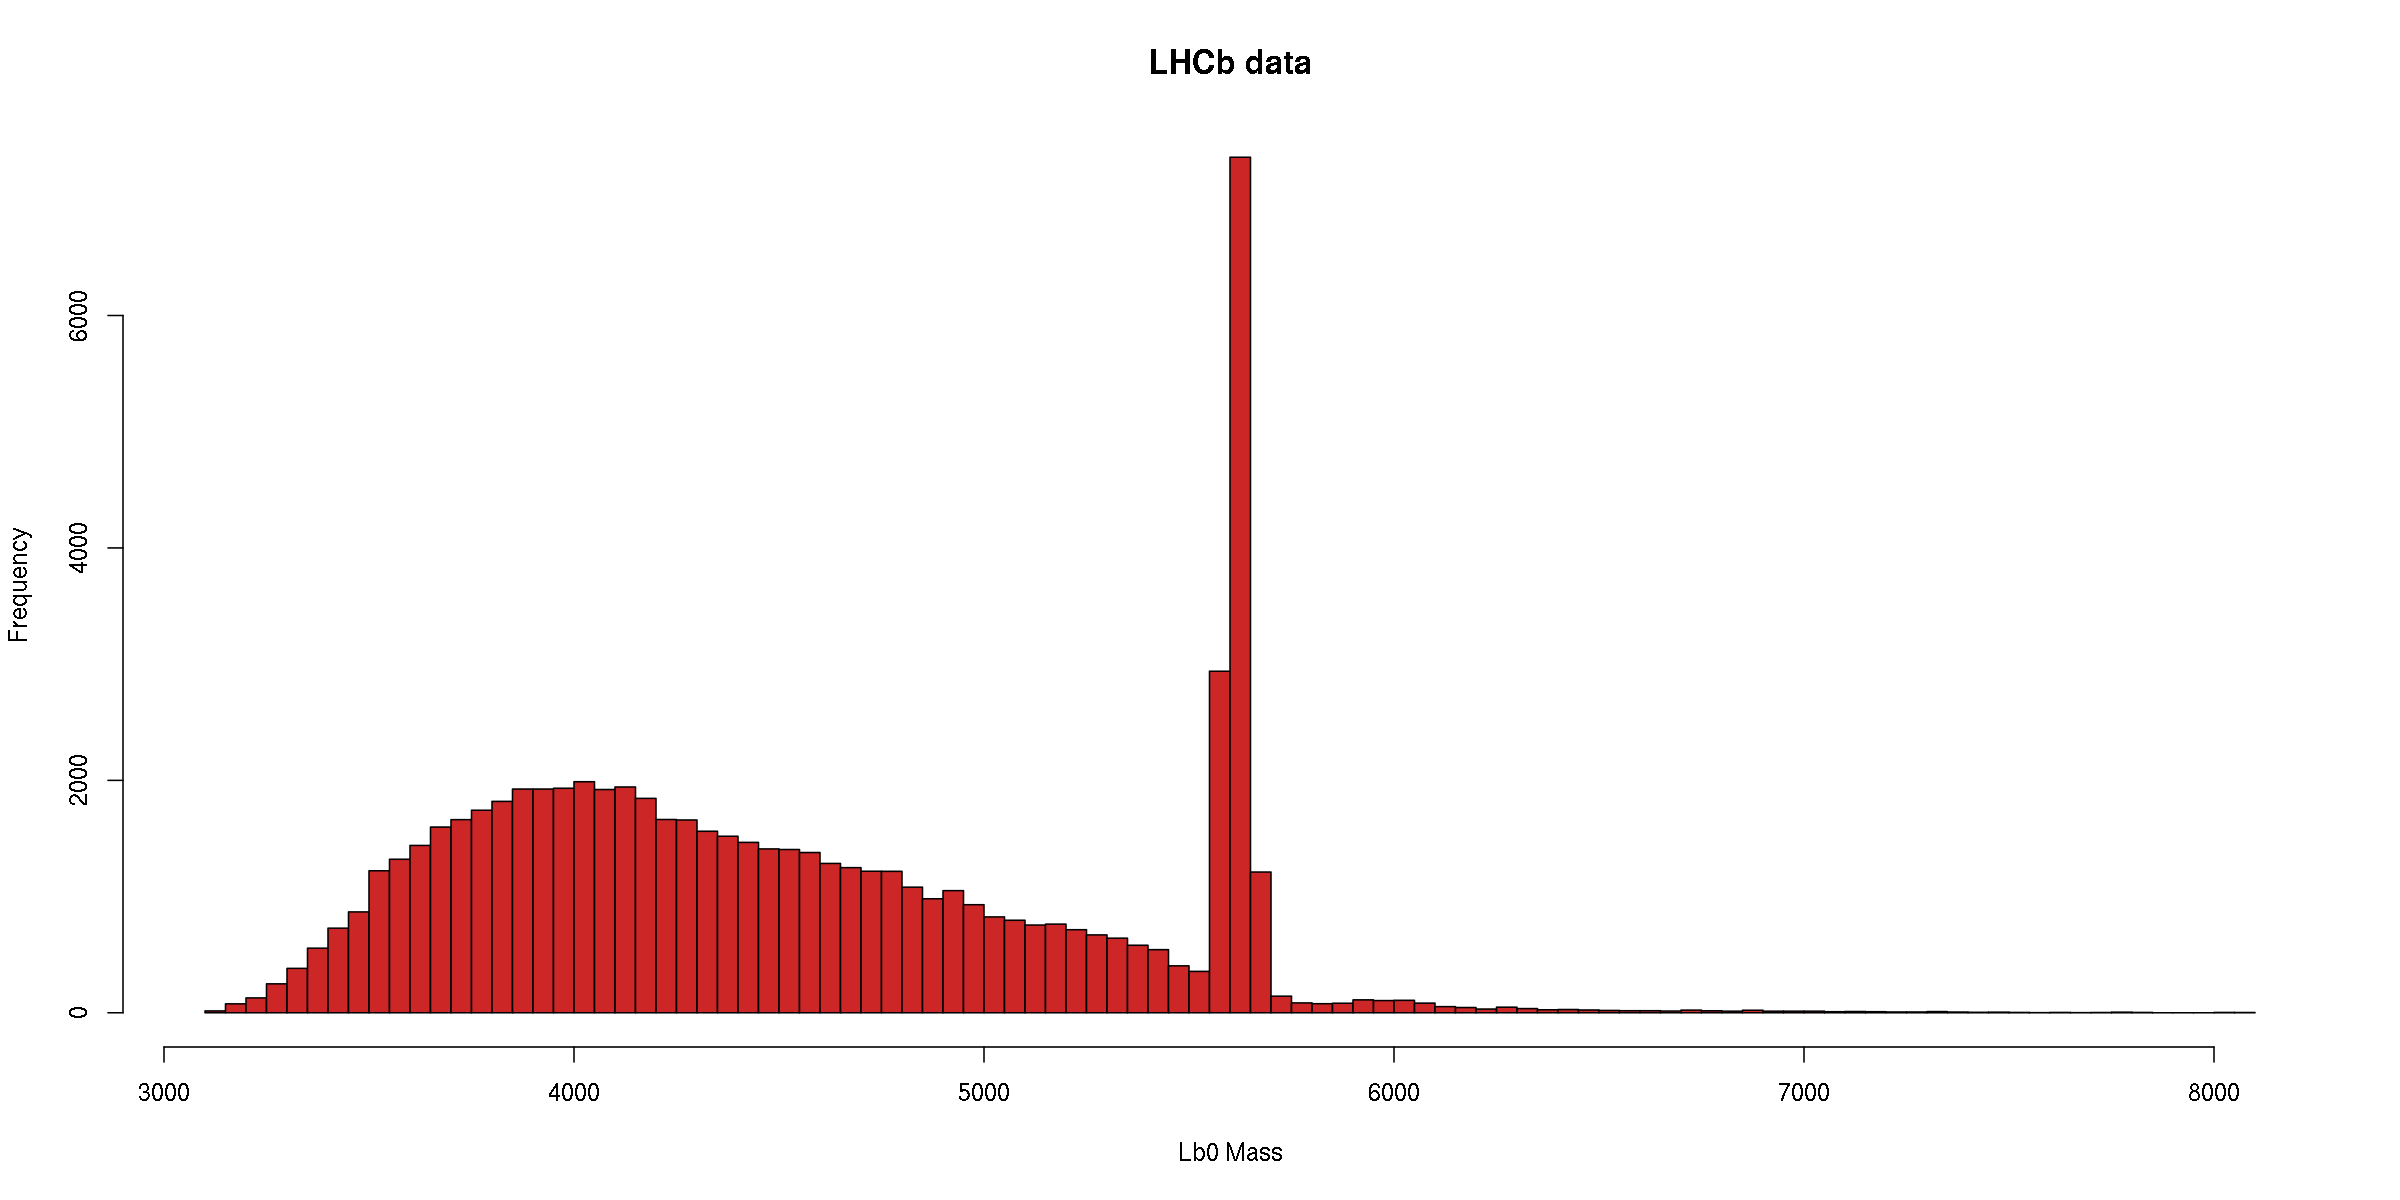

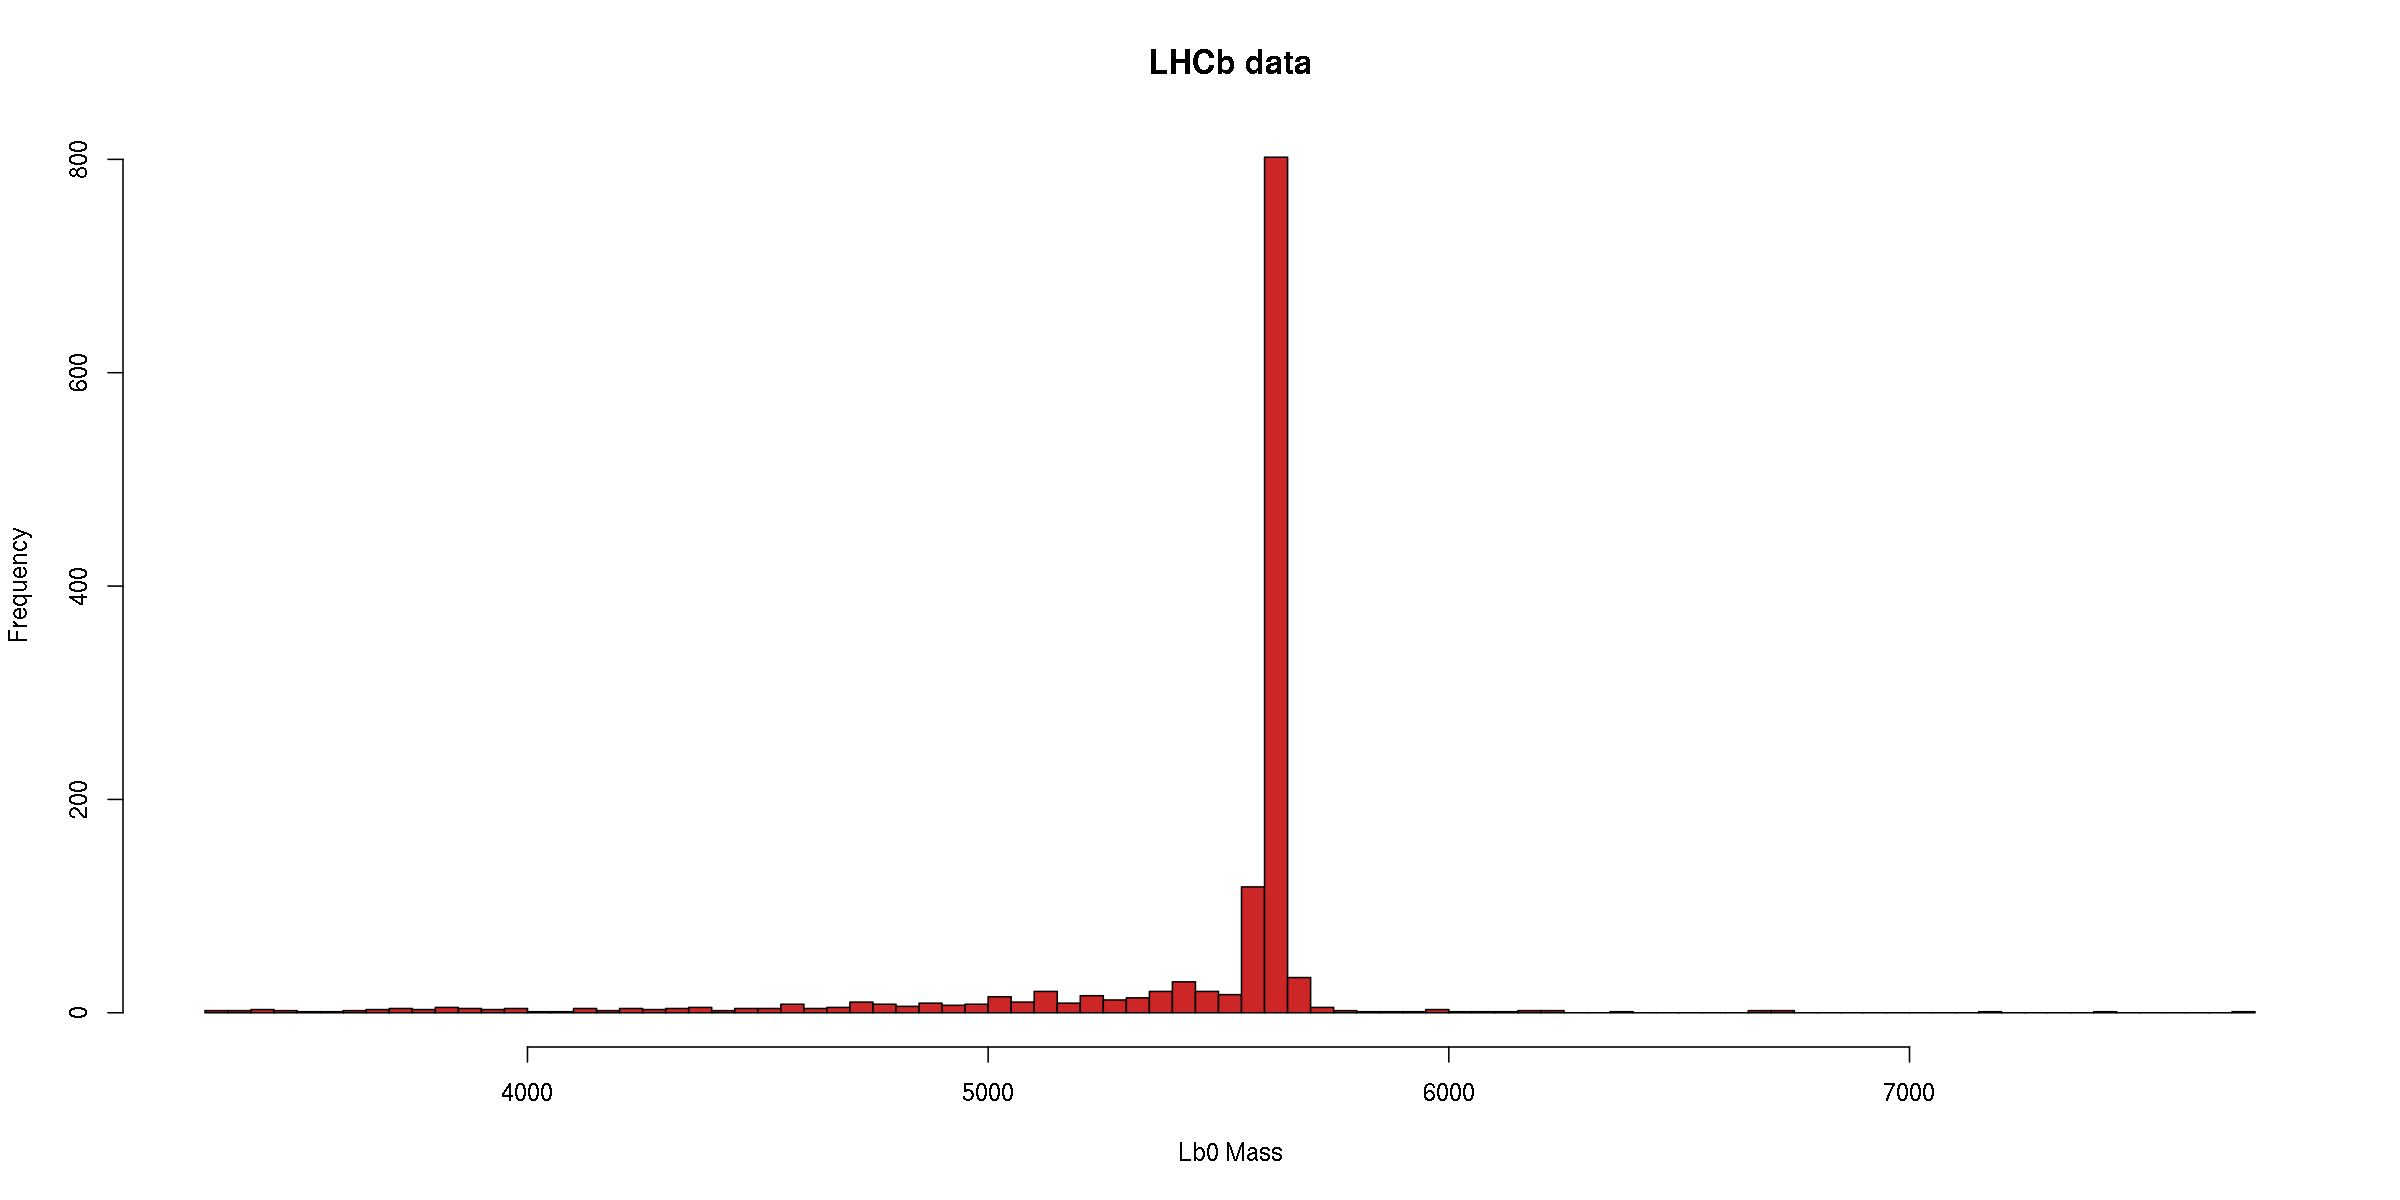

In [53]:
hist(data.cutted.lhcb$Lambda_b0_MM_F[y_cutted_lhcb==0], breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
hist(data.cutted.lhcb$Lambda_b0_MM_F[y_cutted_lhcb==1], breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)

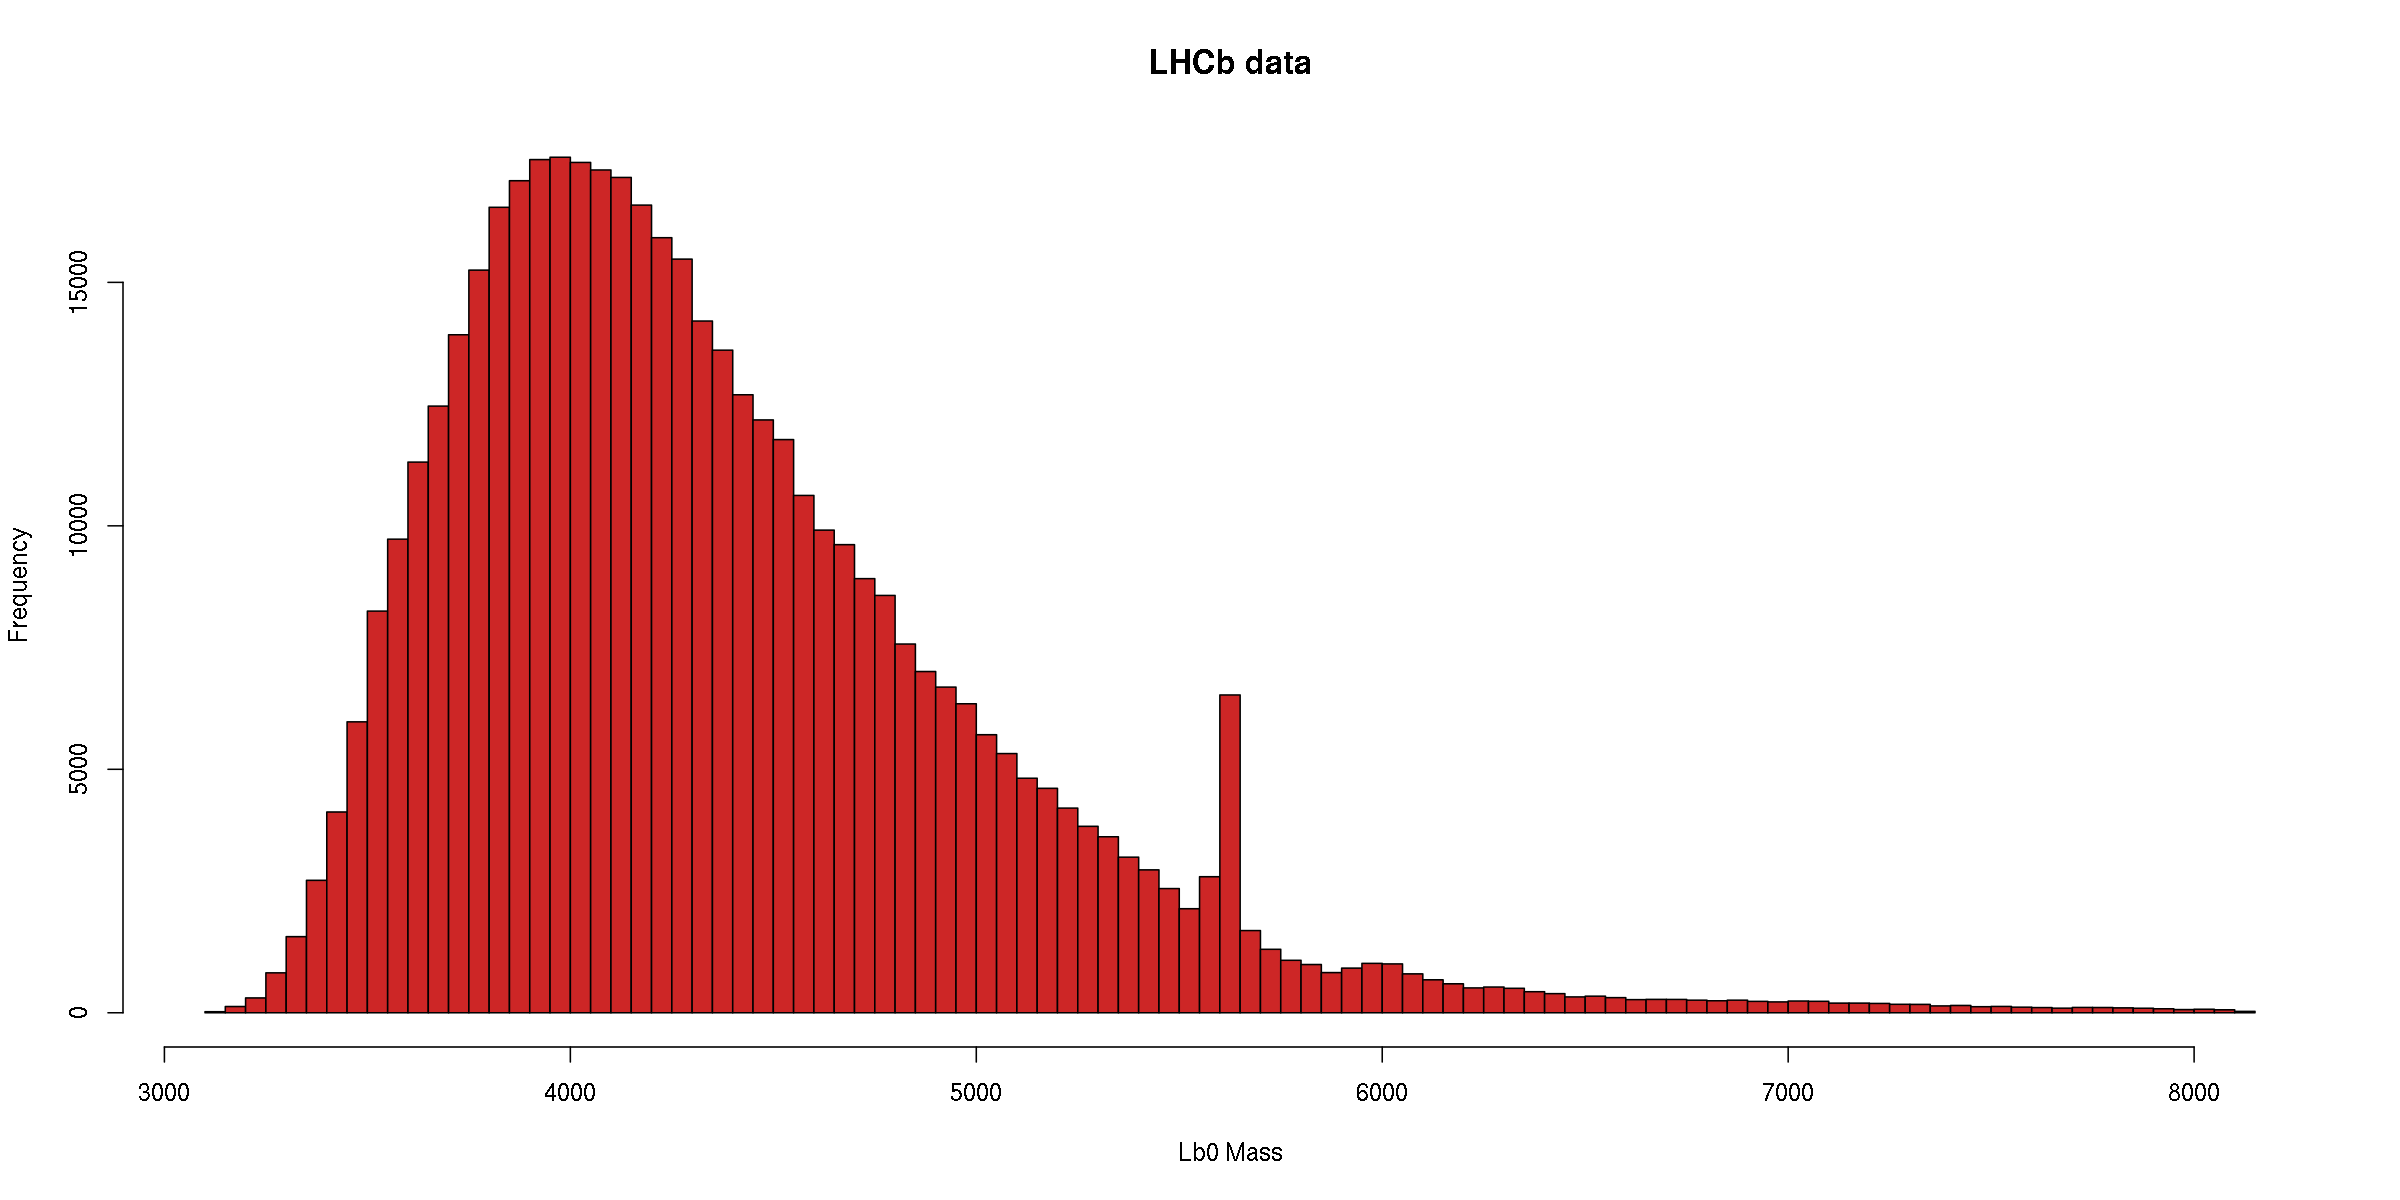

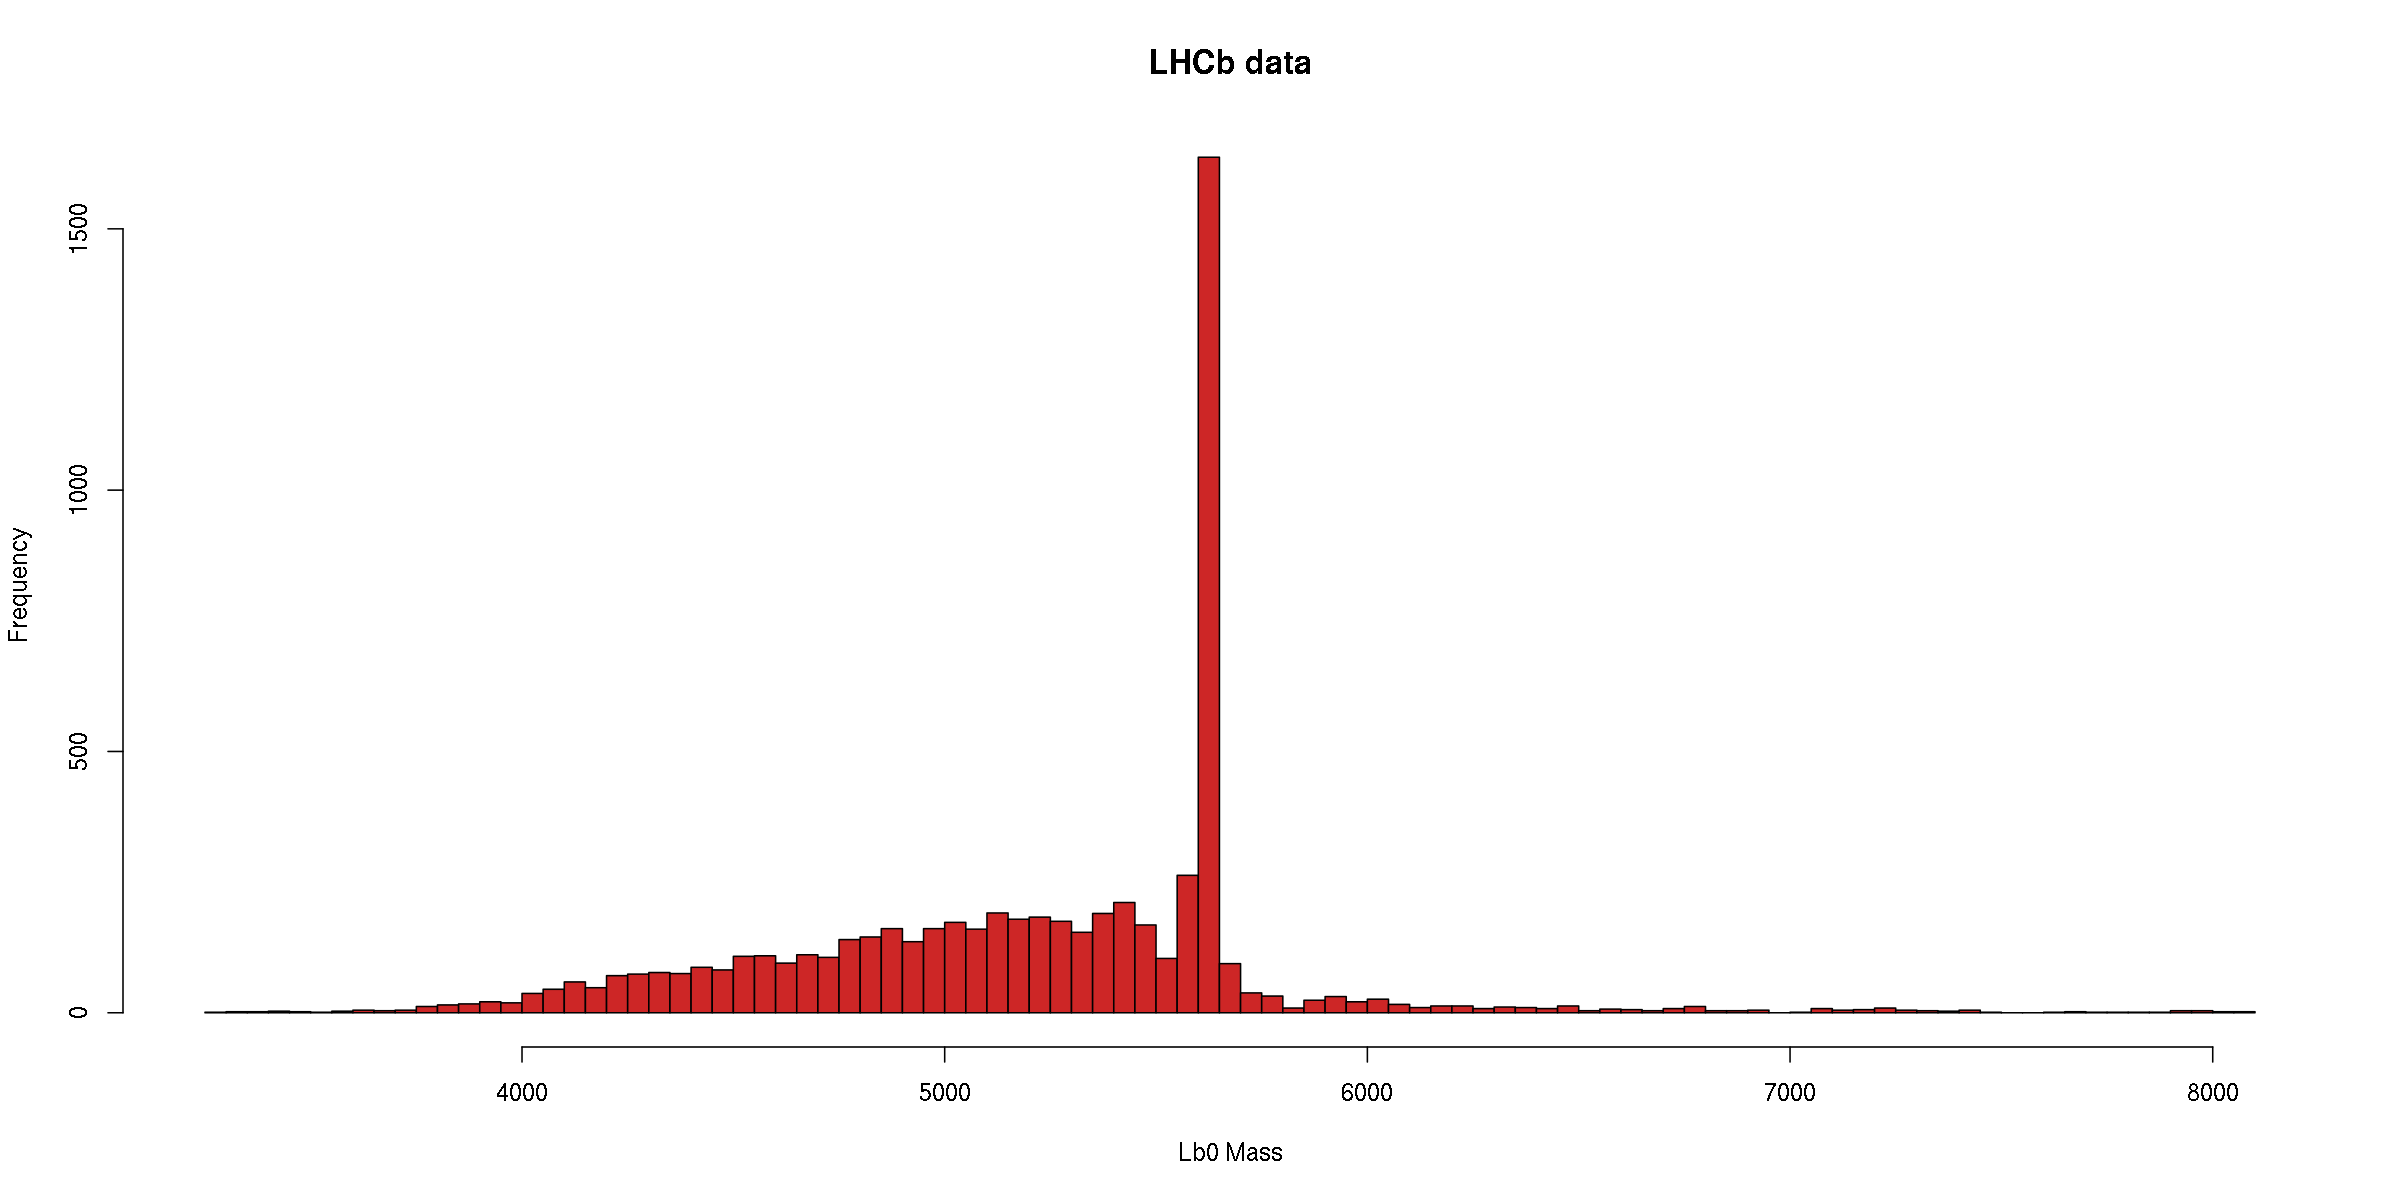

In [54]:
hist(data.lhcb$Lambda_b0_MM_F[y_lhcb==0], breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
hist(data.lhcb$Lambda_b0_MM_F[y_lhcb==1], breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)

In [55]:
y_lhcb_pred <- model %>% predict(x_lhcb)

In [56]:
y_cutted_lhcb_pred <- model %>% predict(x_cutted_lhcb)

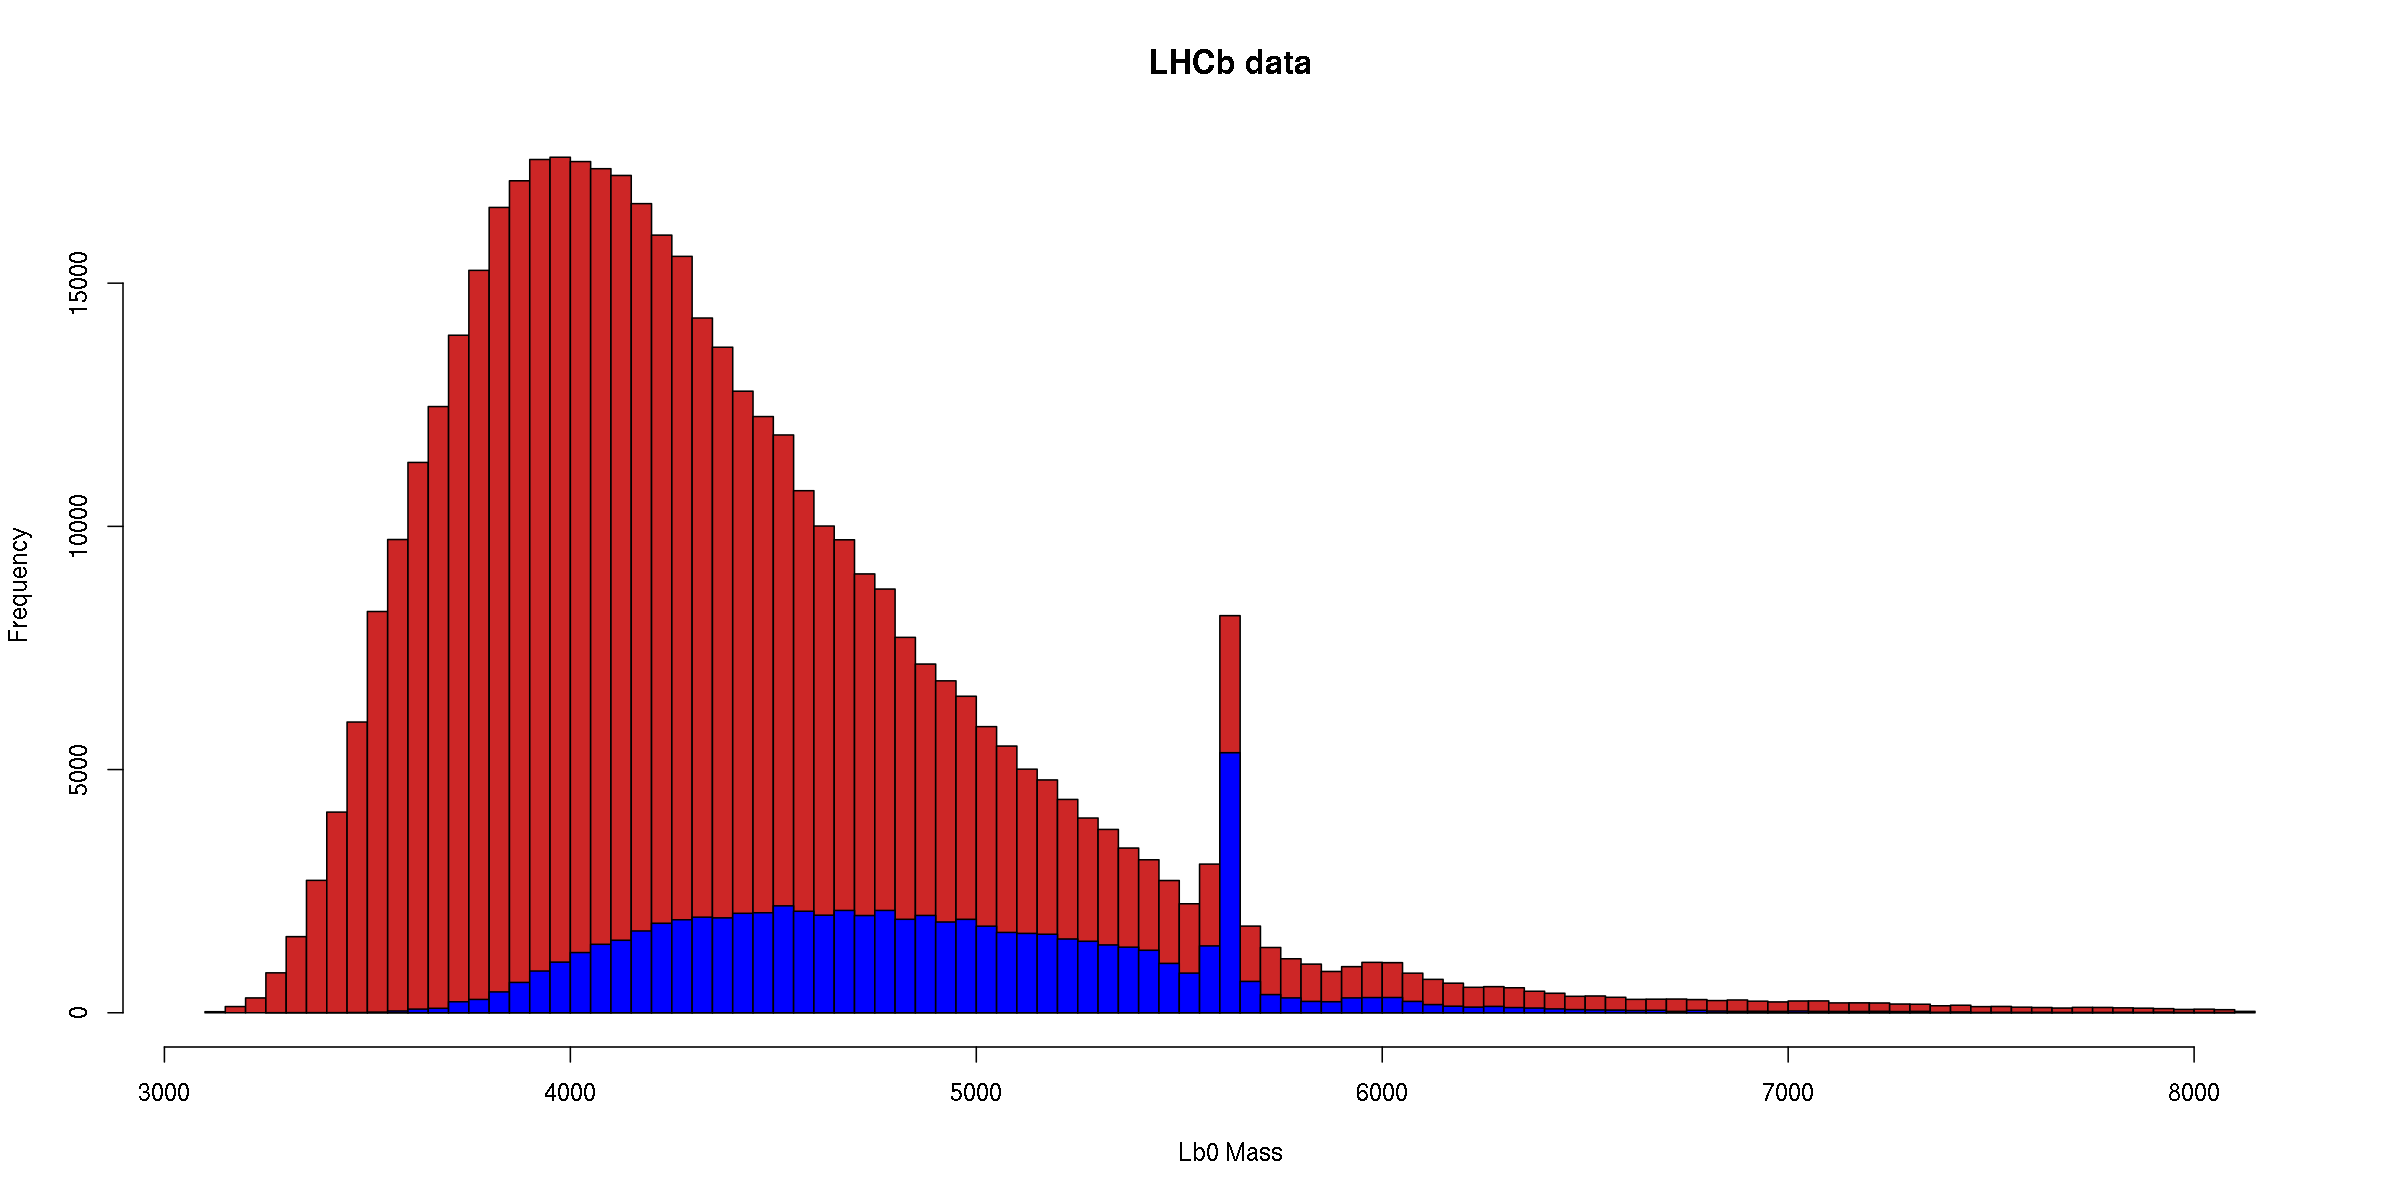

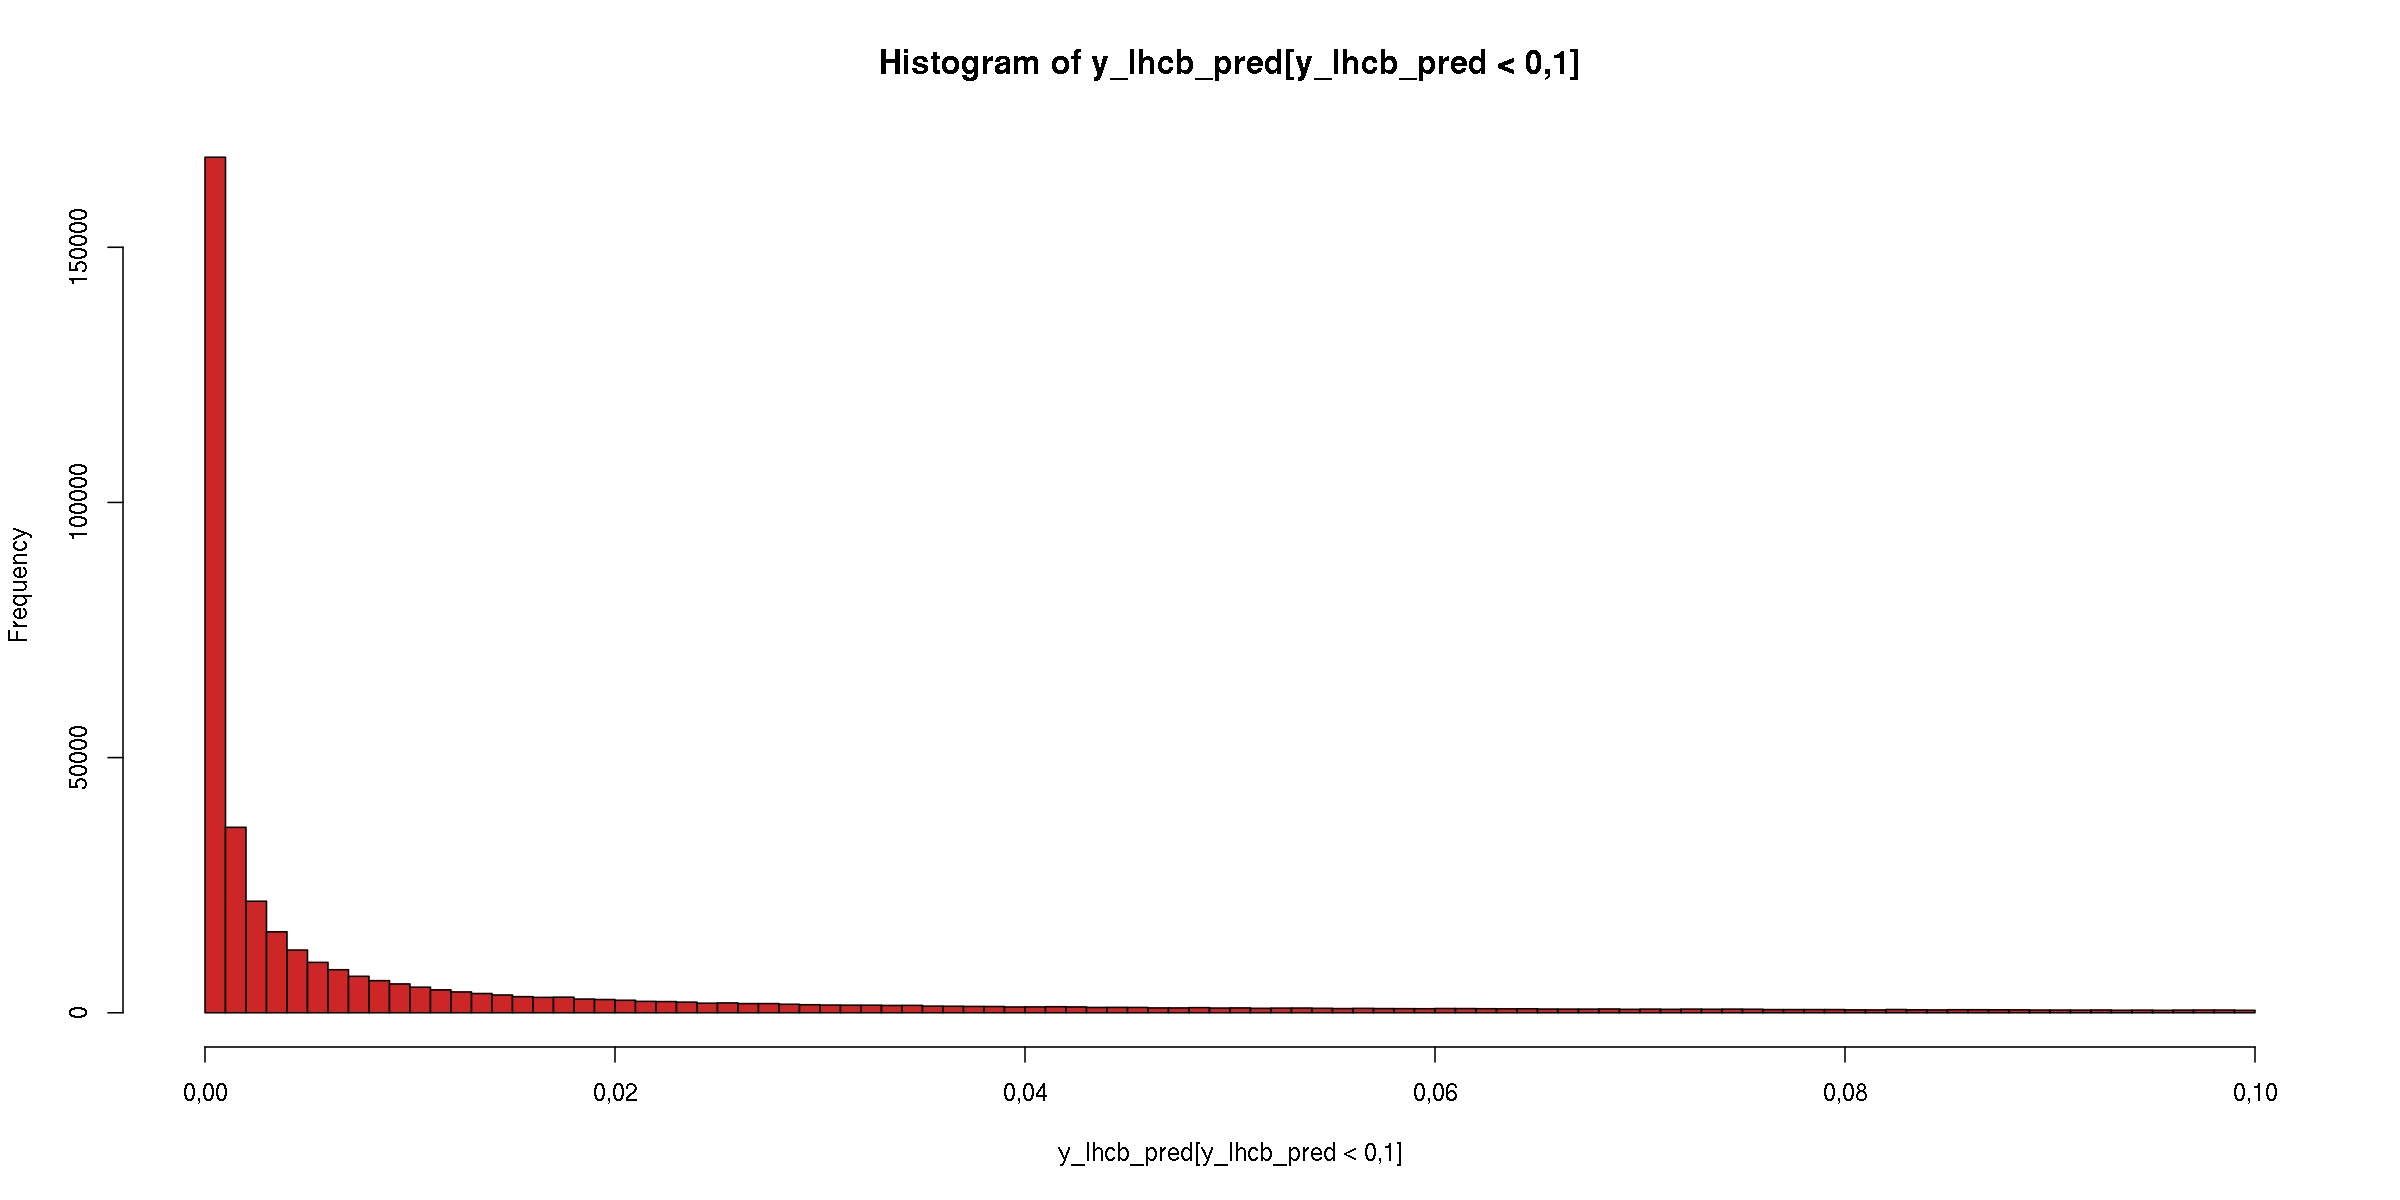

In [57]:
hist(data.lhcb$Lambda_b0_MM_F[y_lhcb_pred>0.0], breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
hist(data.lhcb$Lambda_b0_MM_F[y_lhcb_pred>0.1], breaks=100, add=TRUE, col='blue')
hist(y_lhcb_pred[y_lhcb_pred<0.1], breaks=100, col="firebrick3")

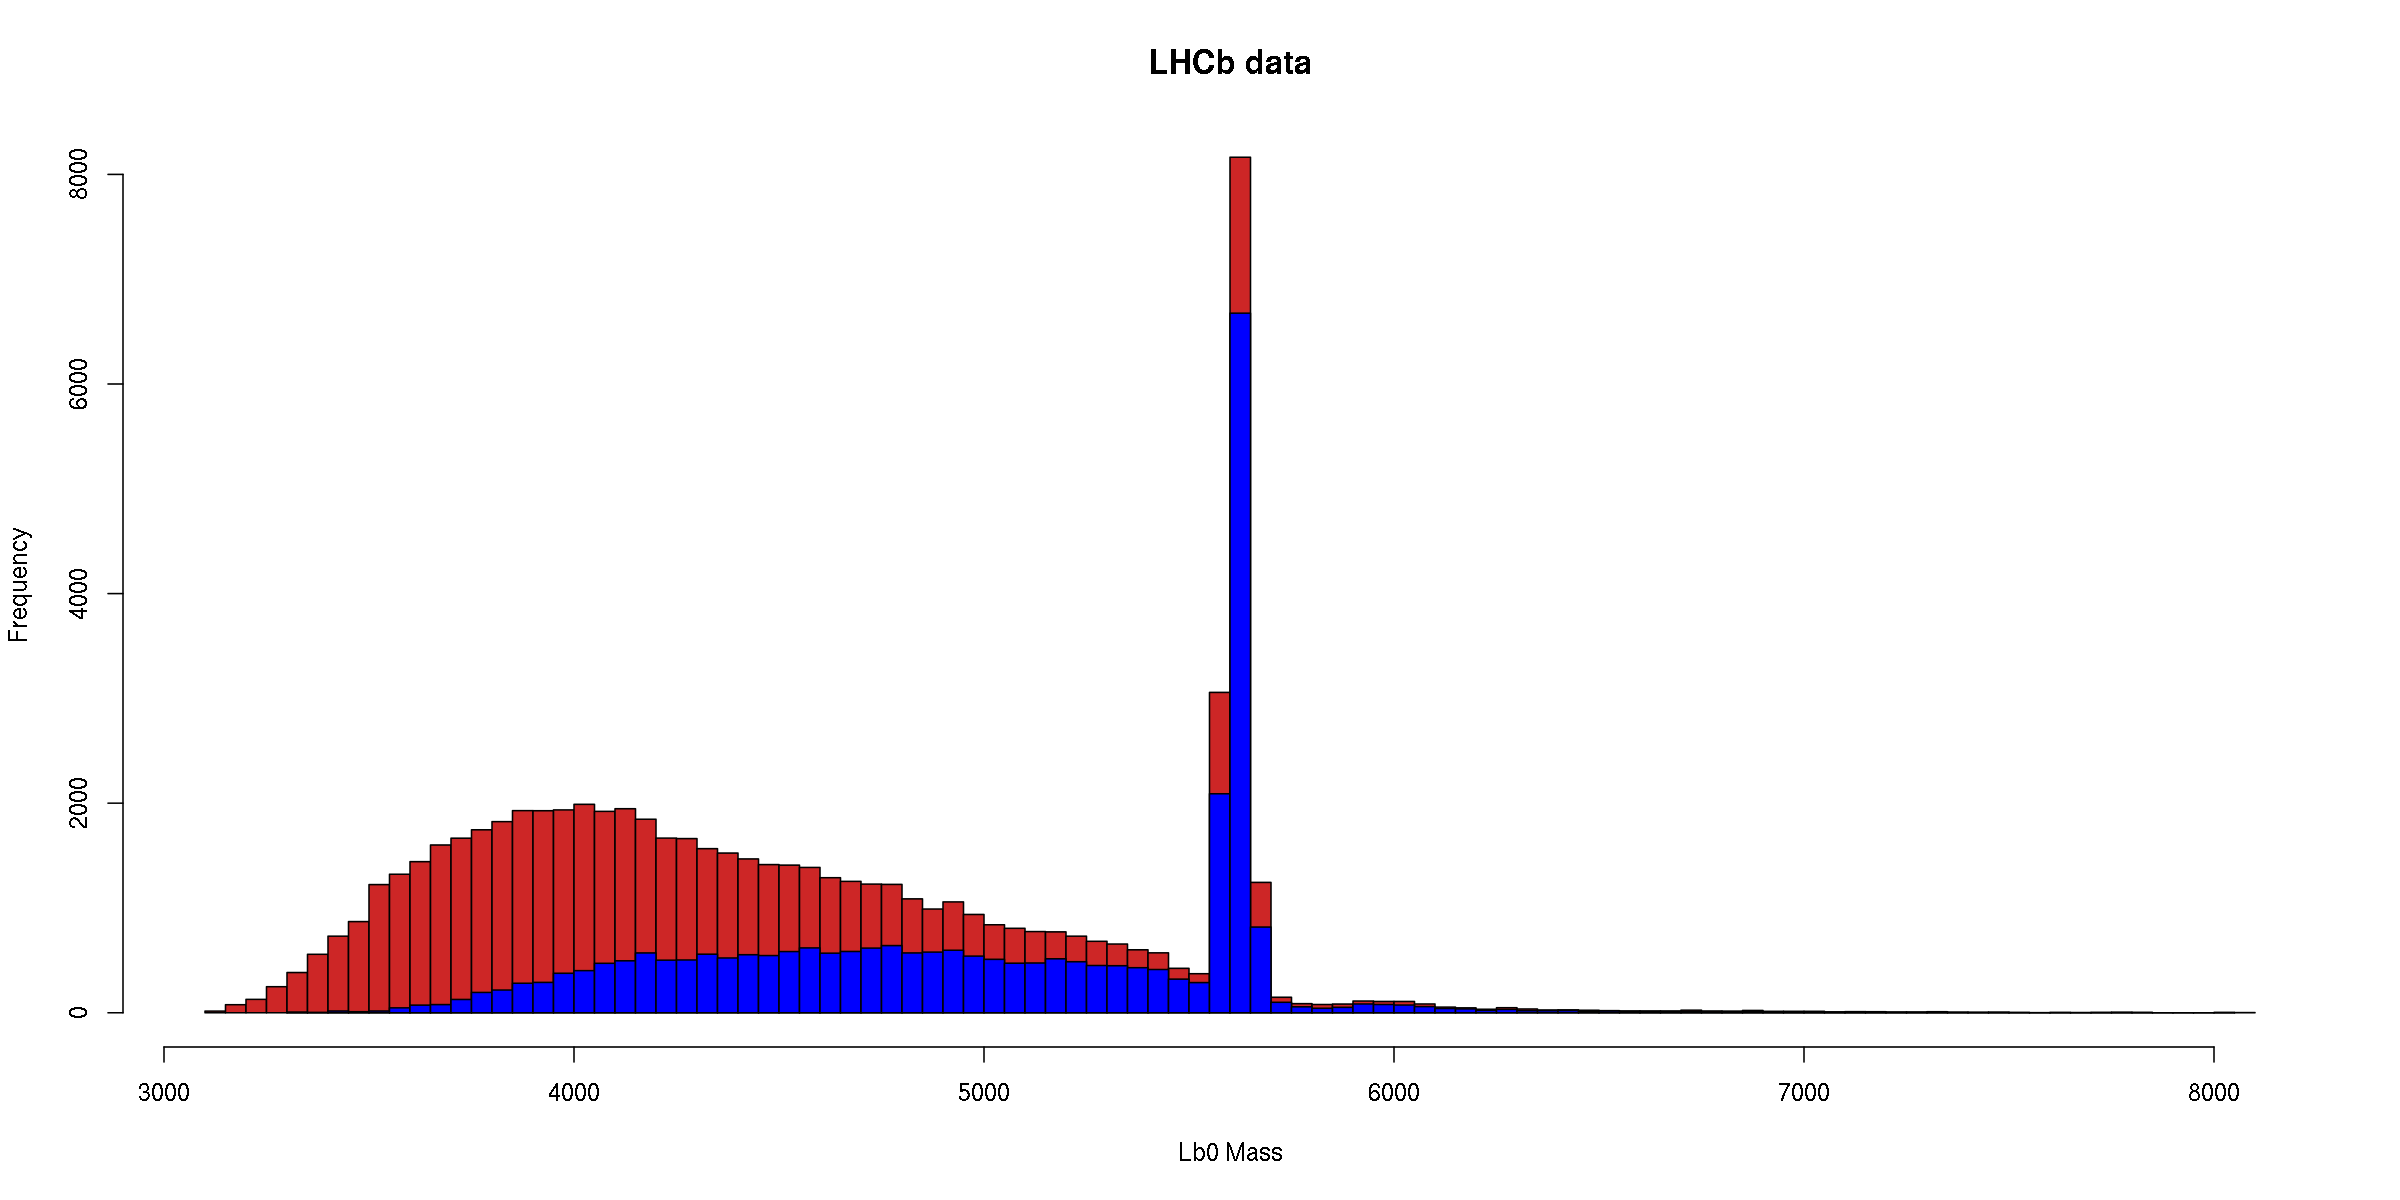

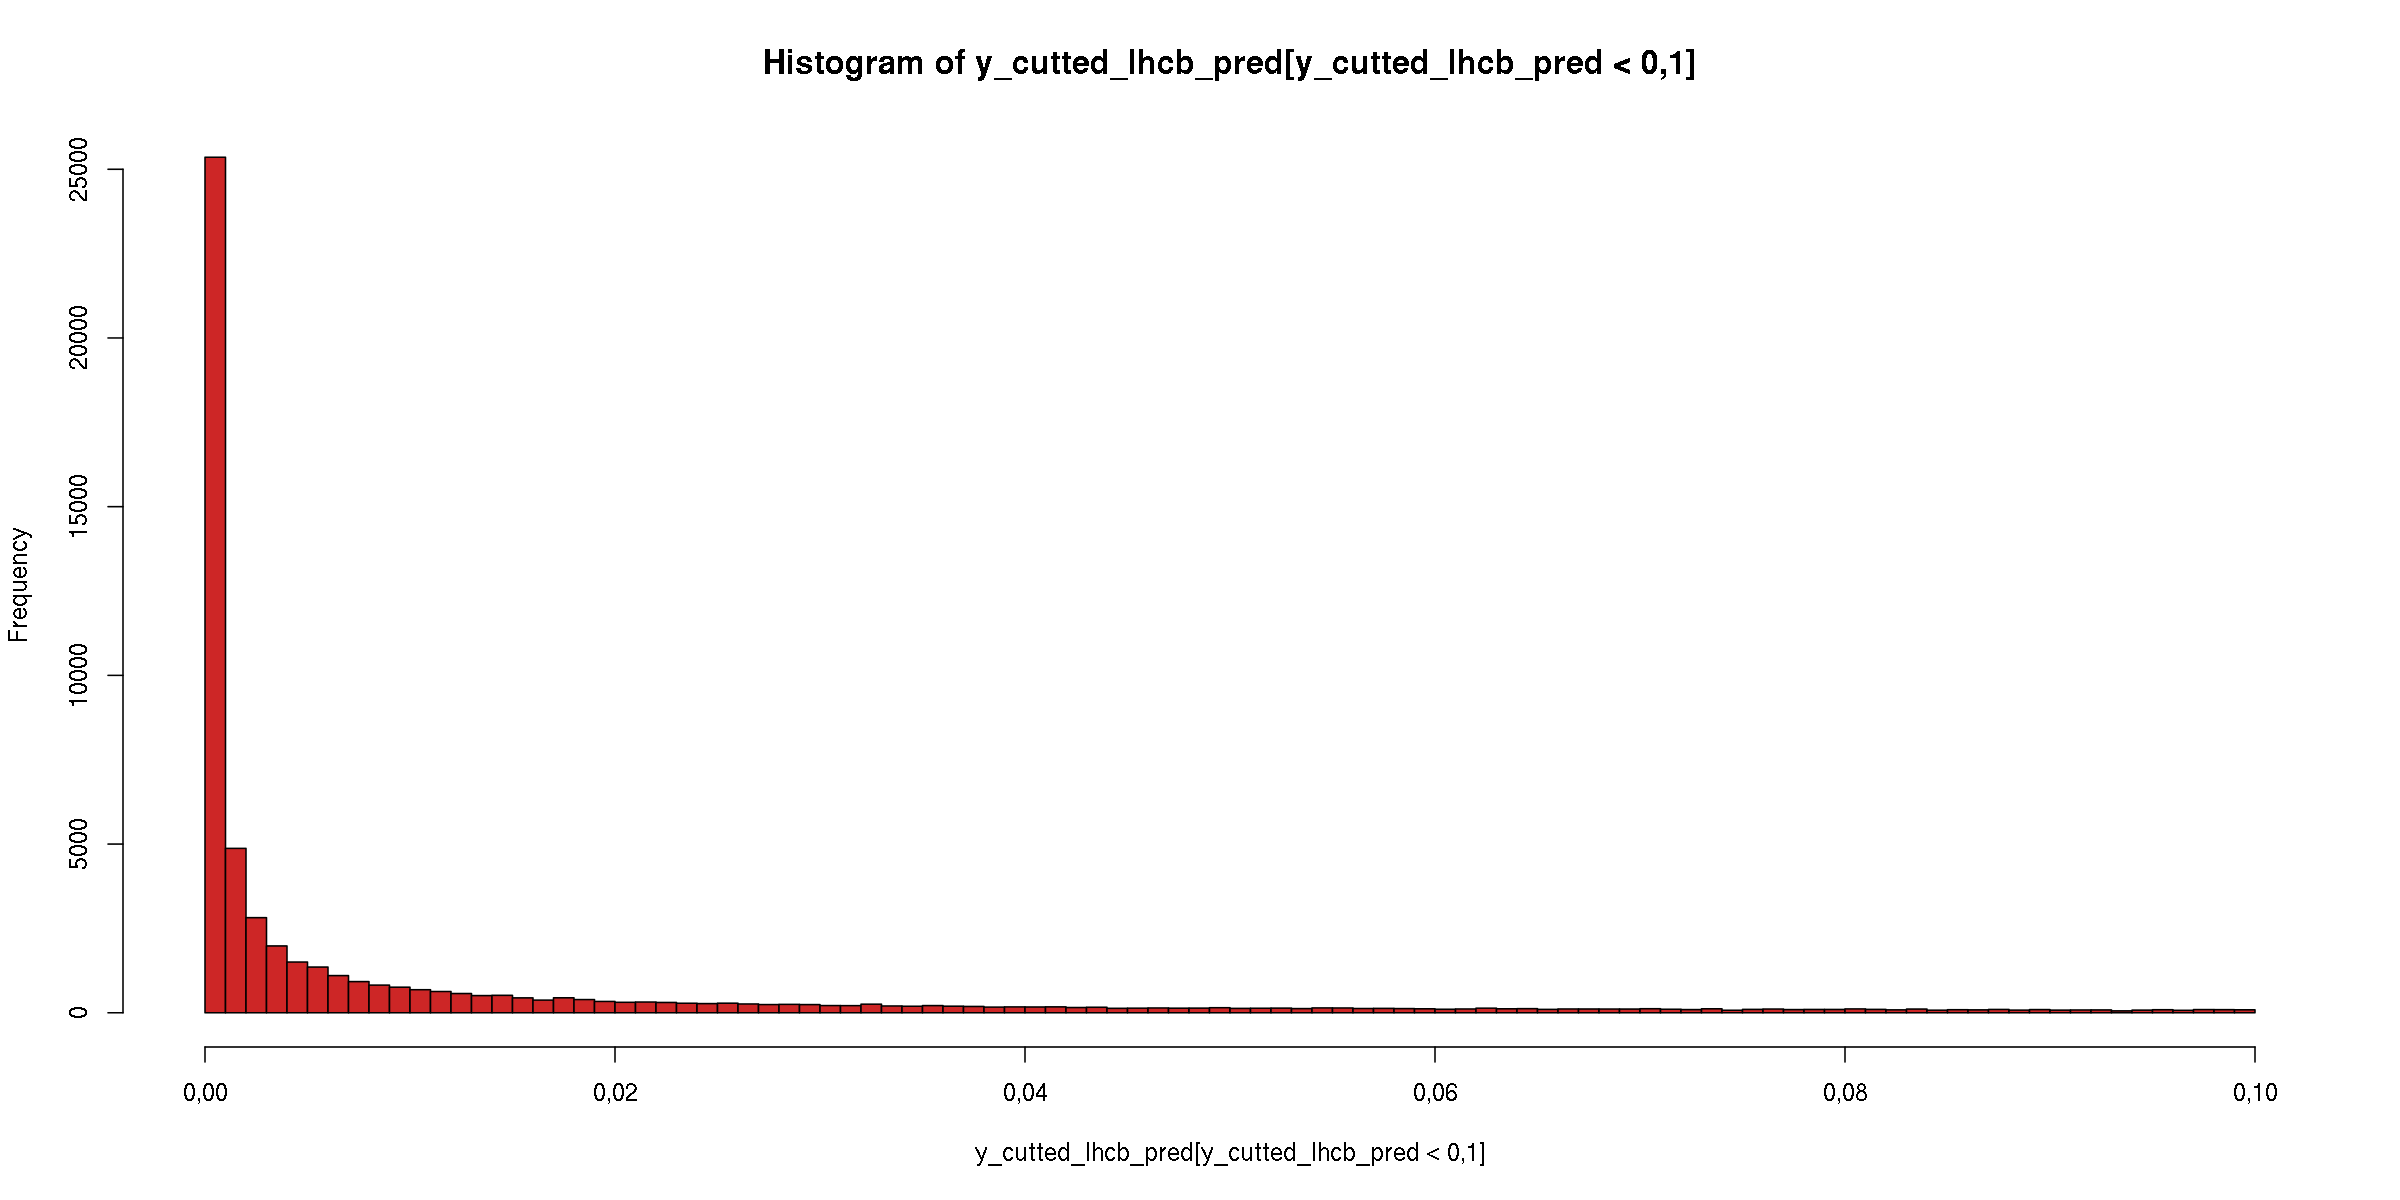

In [58]:
hist(data.cutted.lhcb$Lambda_b0_MM_F[y_cutted_lhcb_pred>0.0],  breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
hist(data.cutted.lhcb$Lambda_b0_MM_F[y_cutted_lhcb_pred>0.01], breaks=100, add=TRUE, col='blue')
hist(y_cutted_lhcb_pred[y_cutted_lhcb_pred<0.1], breaks=100, col="firebrick3")

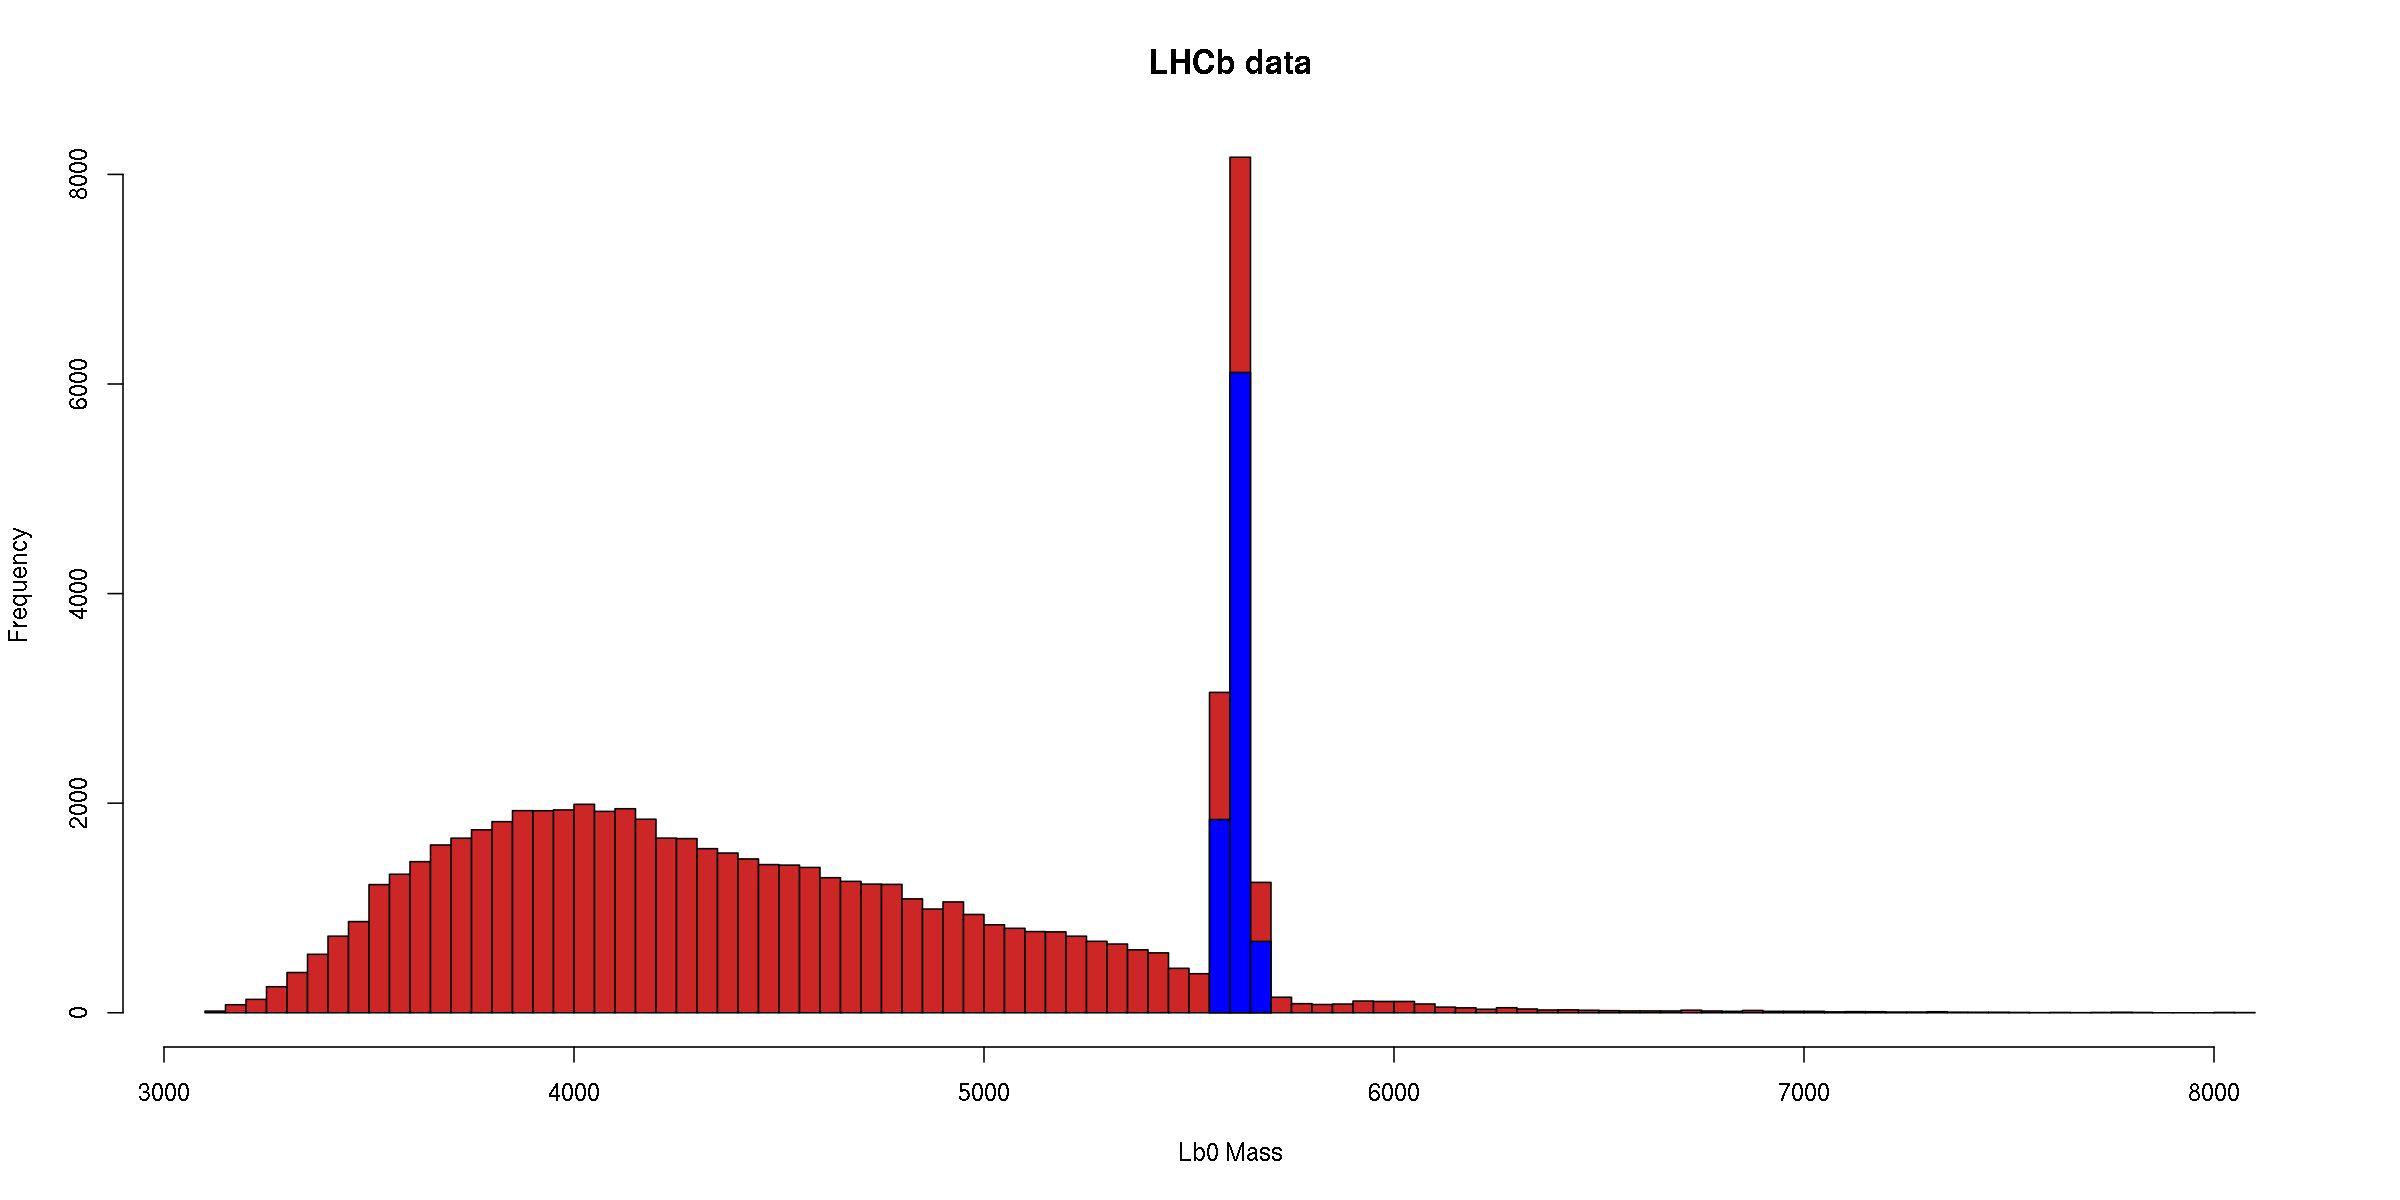

In [59]:
h0 <- hist(data.cutted.lhcb$Lambda_b0_MM_F[y_cutted_lhcb_pred>0.0], breaks=100, col="firebrick3", xlab="Lb0 Mass", main="LHCb data",  probability=FALSE)
h1 <- hist(data.cutted.lhcb$Lambda_b0_MM_F[y_cutted_lhcb_pred>0.02 & data.cutted.lhcb$Lambda_b0_MM_F>5550 & data.cutted.lhcb$Lambda_b0_MM_F<5680], breaks=3, add=TRUE, col='blue')

In [60]:
sum(h1$counts)

[1] 8635

In [45]:
#myList <- list(dropout1= c(0.3, 0.2), 
#               unit2=c (128, 64), 
#              epochs= c(3,5))
##myList <- list(dropout1= c(0.3), 
##               unit2=c (128) )
#
#tuned_grid <- tune_builder(build_model, myParams, myList, x_train, y_train, 4, FALSE )
#
#print(tuned_grid)